# The Datasaurus Dozen: same stats, big differences, and the amalgamation paradox.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
tablesaur = pd.read_table("datasaurusdozen.csv")
tablesaur.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
tablesaur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
dataset    1846 non-null object
x          1846 non-null float64
y          1846 non-null float64
dtypes: float64(2), object(1)
memory usage: 43.3+ KB


In [4]:
tablesaur.dataset.unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [5]:
tablesaur.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [6]:
f1 = "y~x"
model = ols(formula = f1, data = tablesaur).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.072
Date:                Sun, 12 May 2019   Prob (F-statistic):            0.00454
Time:                        22:46:14   Log-Likelihood:                -8688.5
No. Observations:                1846   AIC:                         1.738e+04
Df Residuals:                    1844   BIC:                         1.739e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.5901      2.119     25.285      0.000      49.433      57.747
x             -0.1061      0.037     -2.841      0.005      -0.179      -0.033
==============================================================================
Omnibus:                     3220.109   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.271
Skew:                           0.167   Prob(JB):                     1.15e-29
Kurtosis:                       1.727   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'All that data')

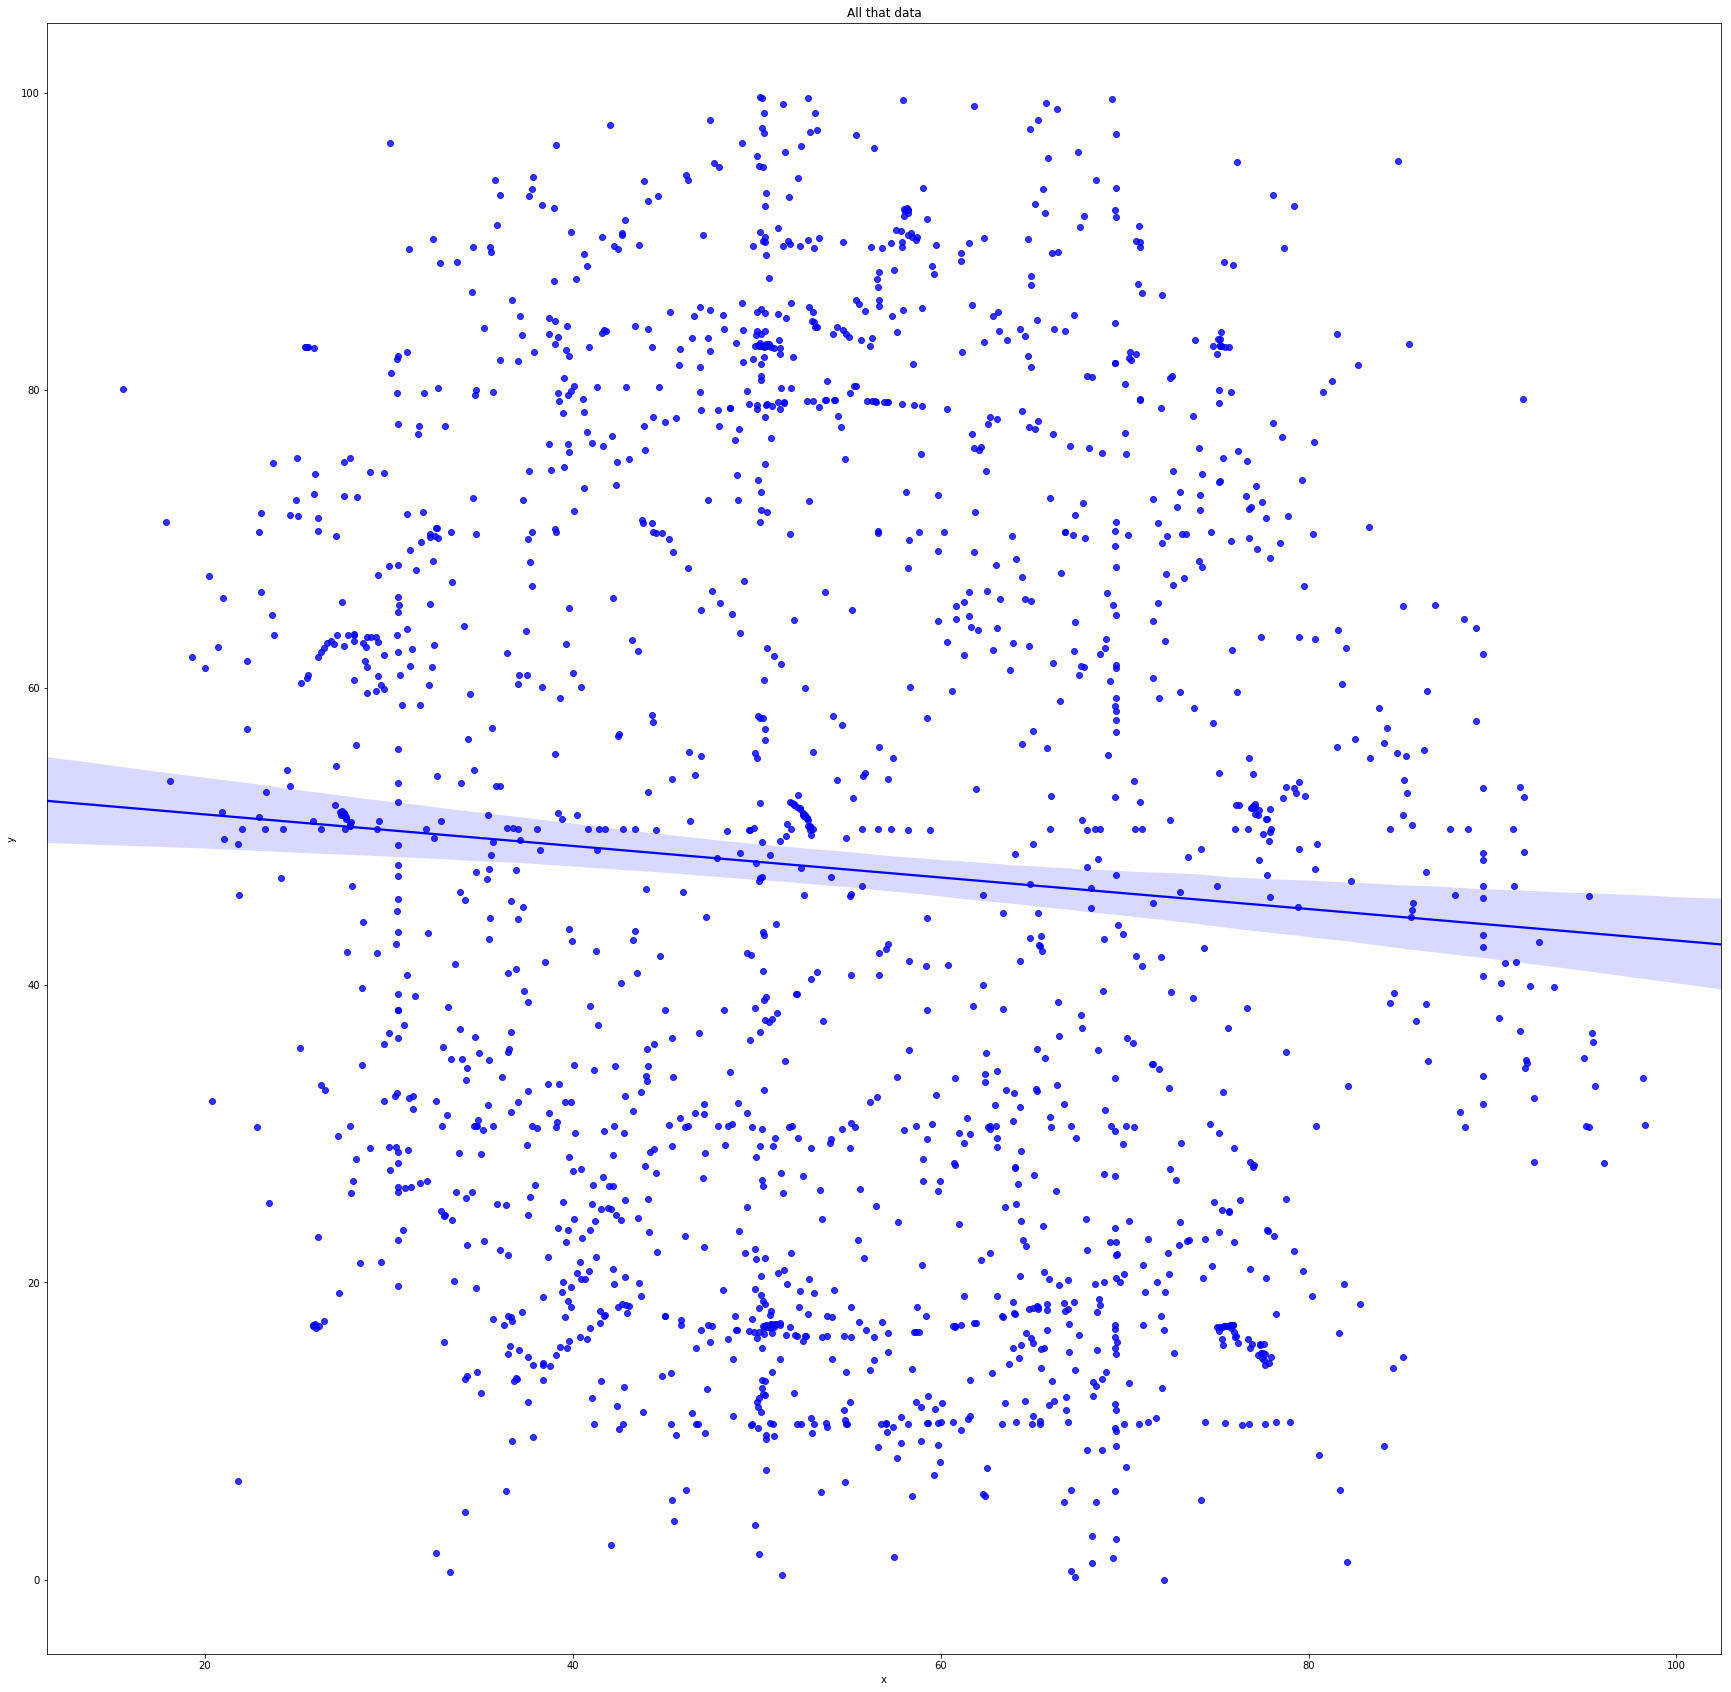

In [99]:
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = tablesaur, color = 'b')
plt.title("All that data")


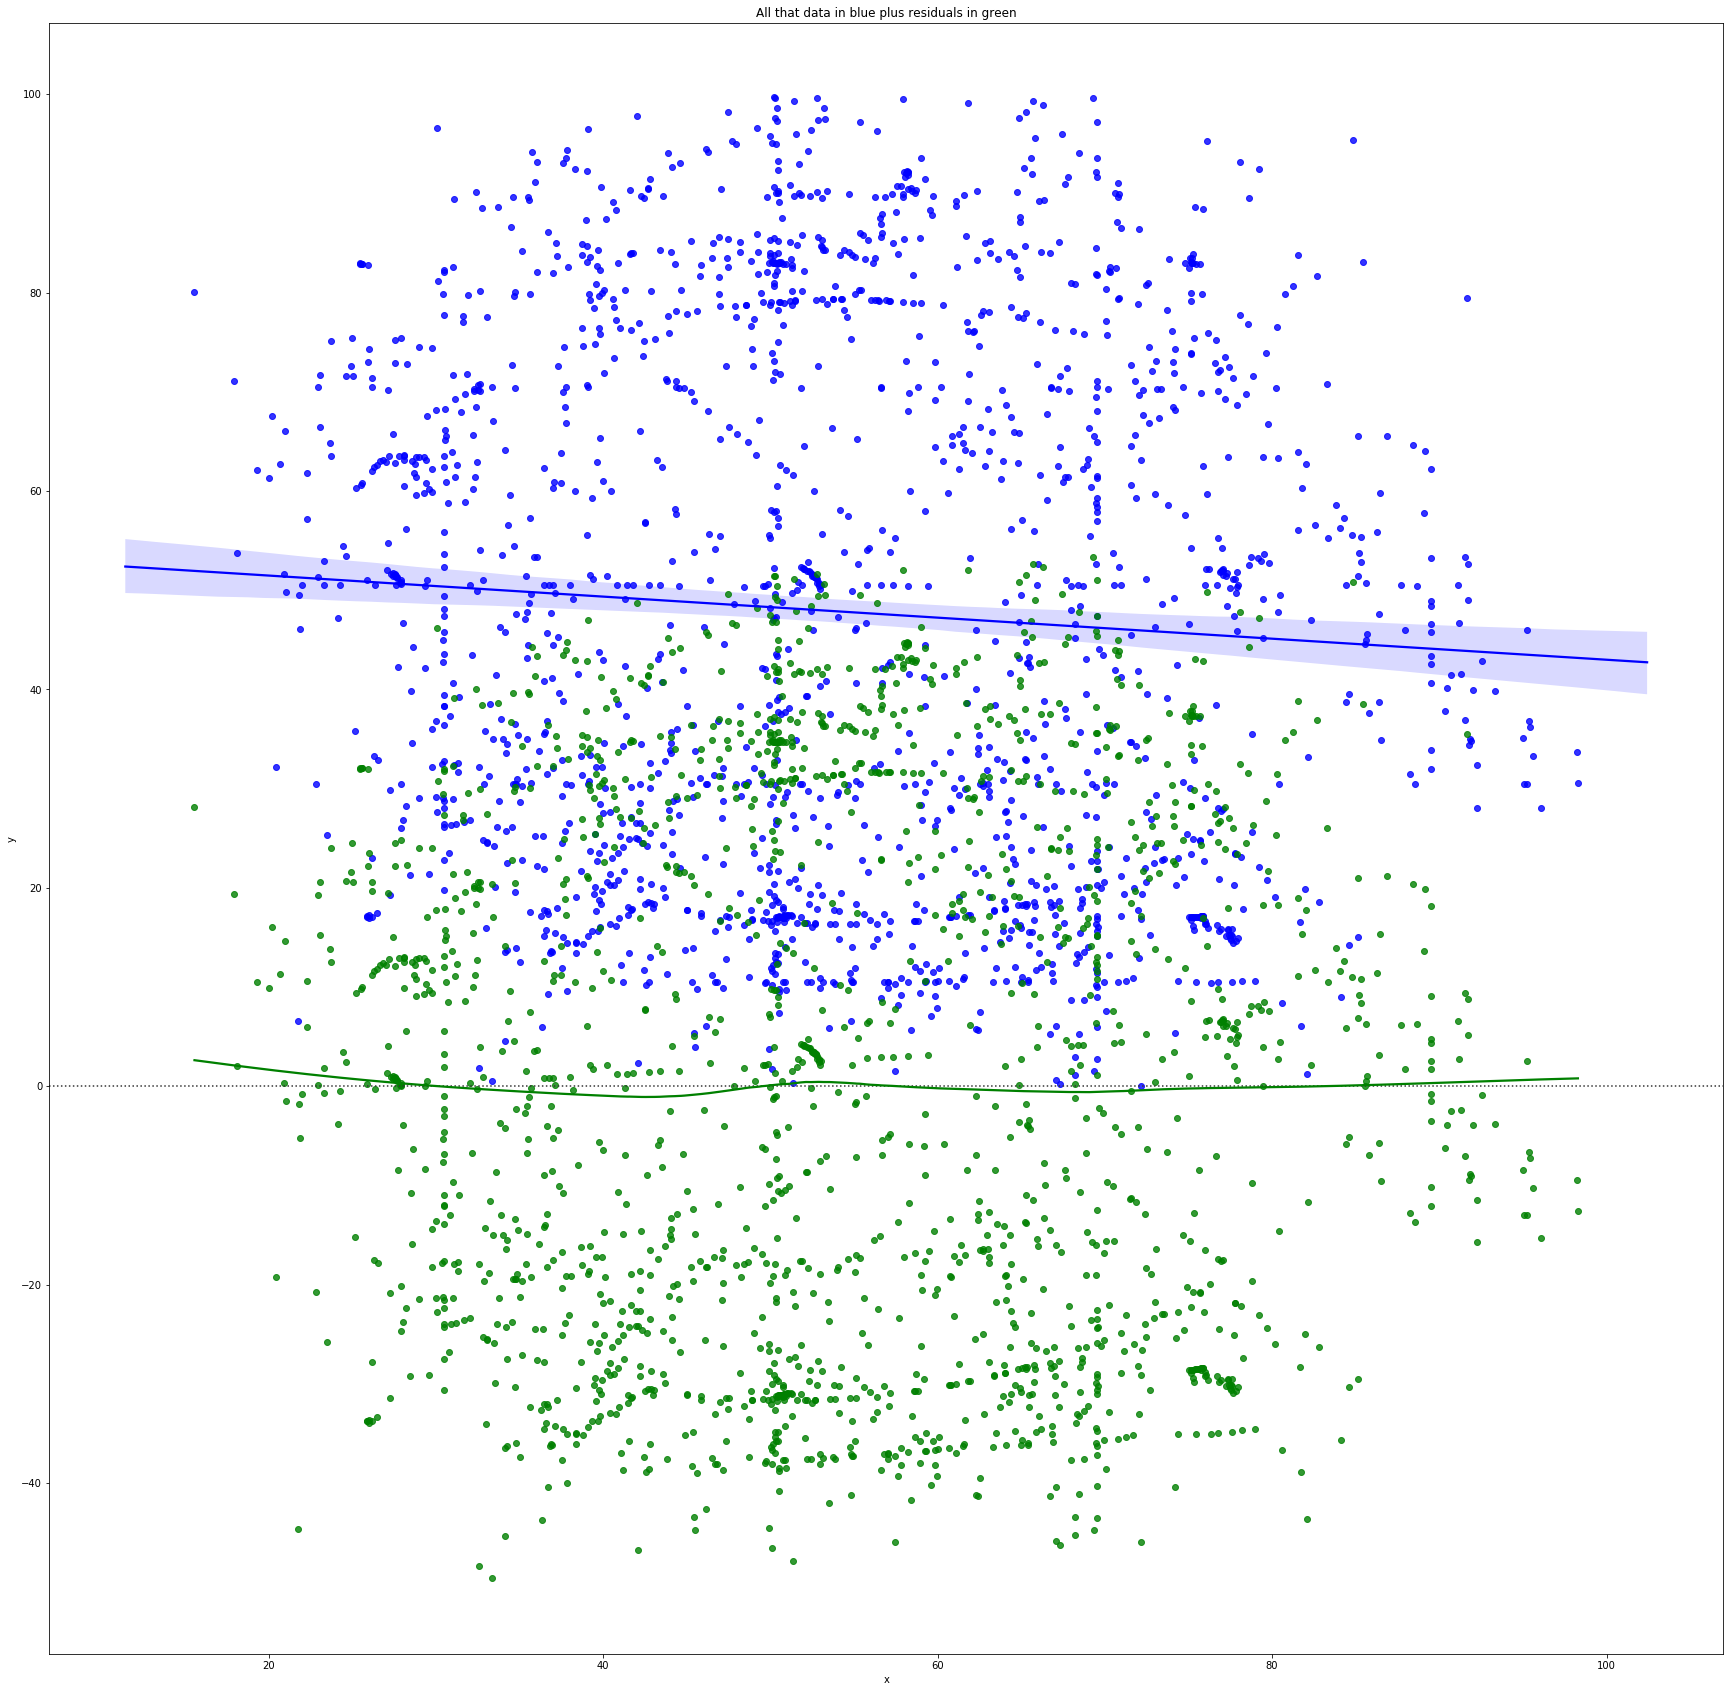

In [98]:
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = tablesaur, color = 'b')
plt.title("All that data in blue plus residuals in green")
sns.residplot('x', 'y', data = tablesaur, lowess=True, color = 'g')

## Wide lines subset

In [10]:
wide_linestable = tablesaur.loc[tablesaur["dataset"] == "wide_lines"]
wide_linestable.drop('dataset', axis = 1).head()

,x,y
1704,65.815540,95.588374
1705,65.672265,91.933402
1706,39.002716,92.261838
1707,37.795303,93.532455
1708,35.513901,89.599190


Text(0.5, 1.0, 'Wide Lines')

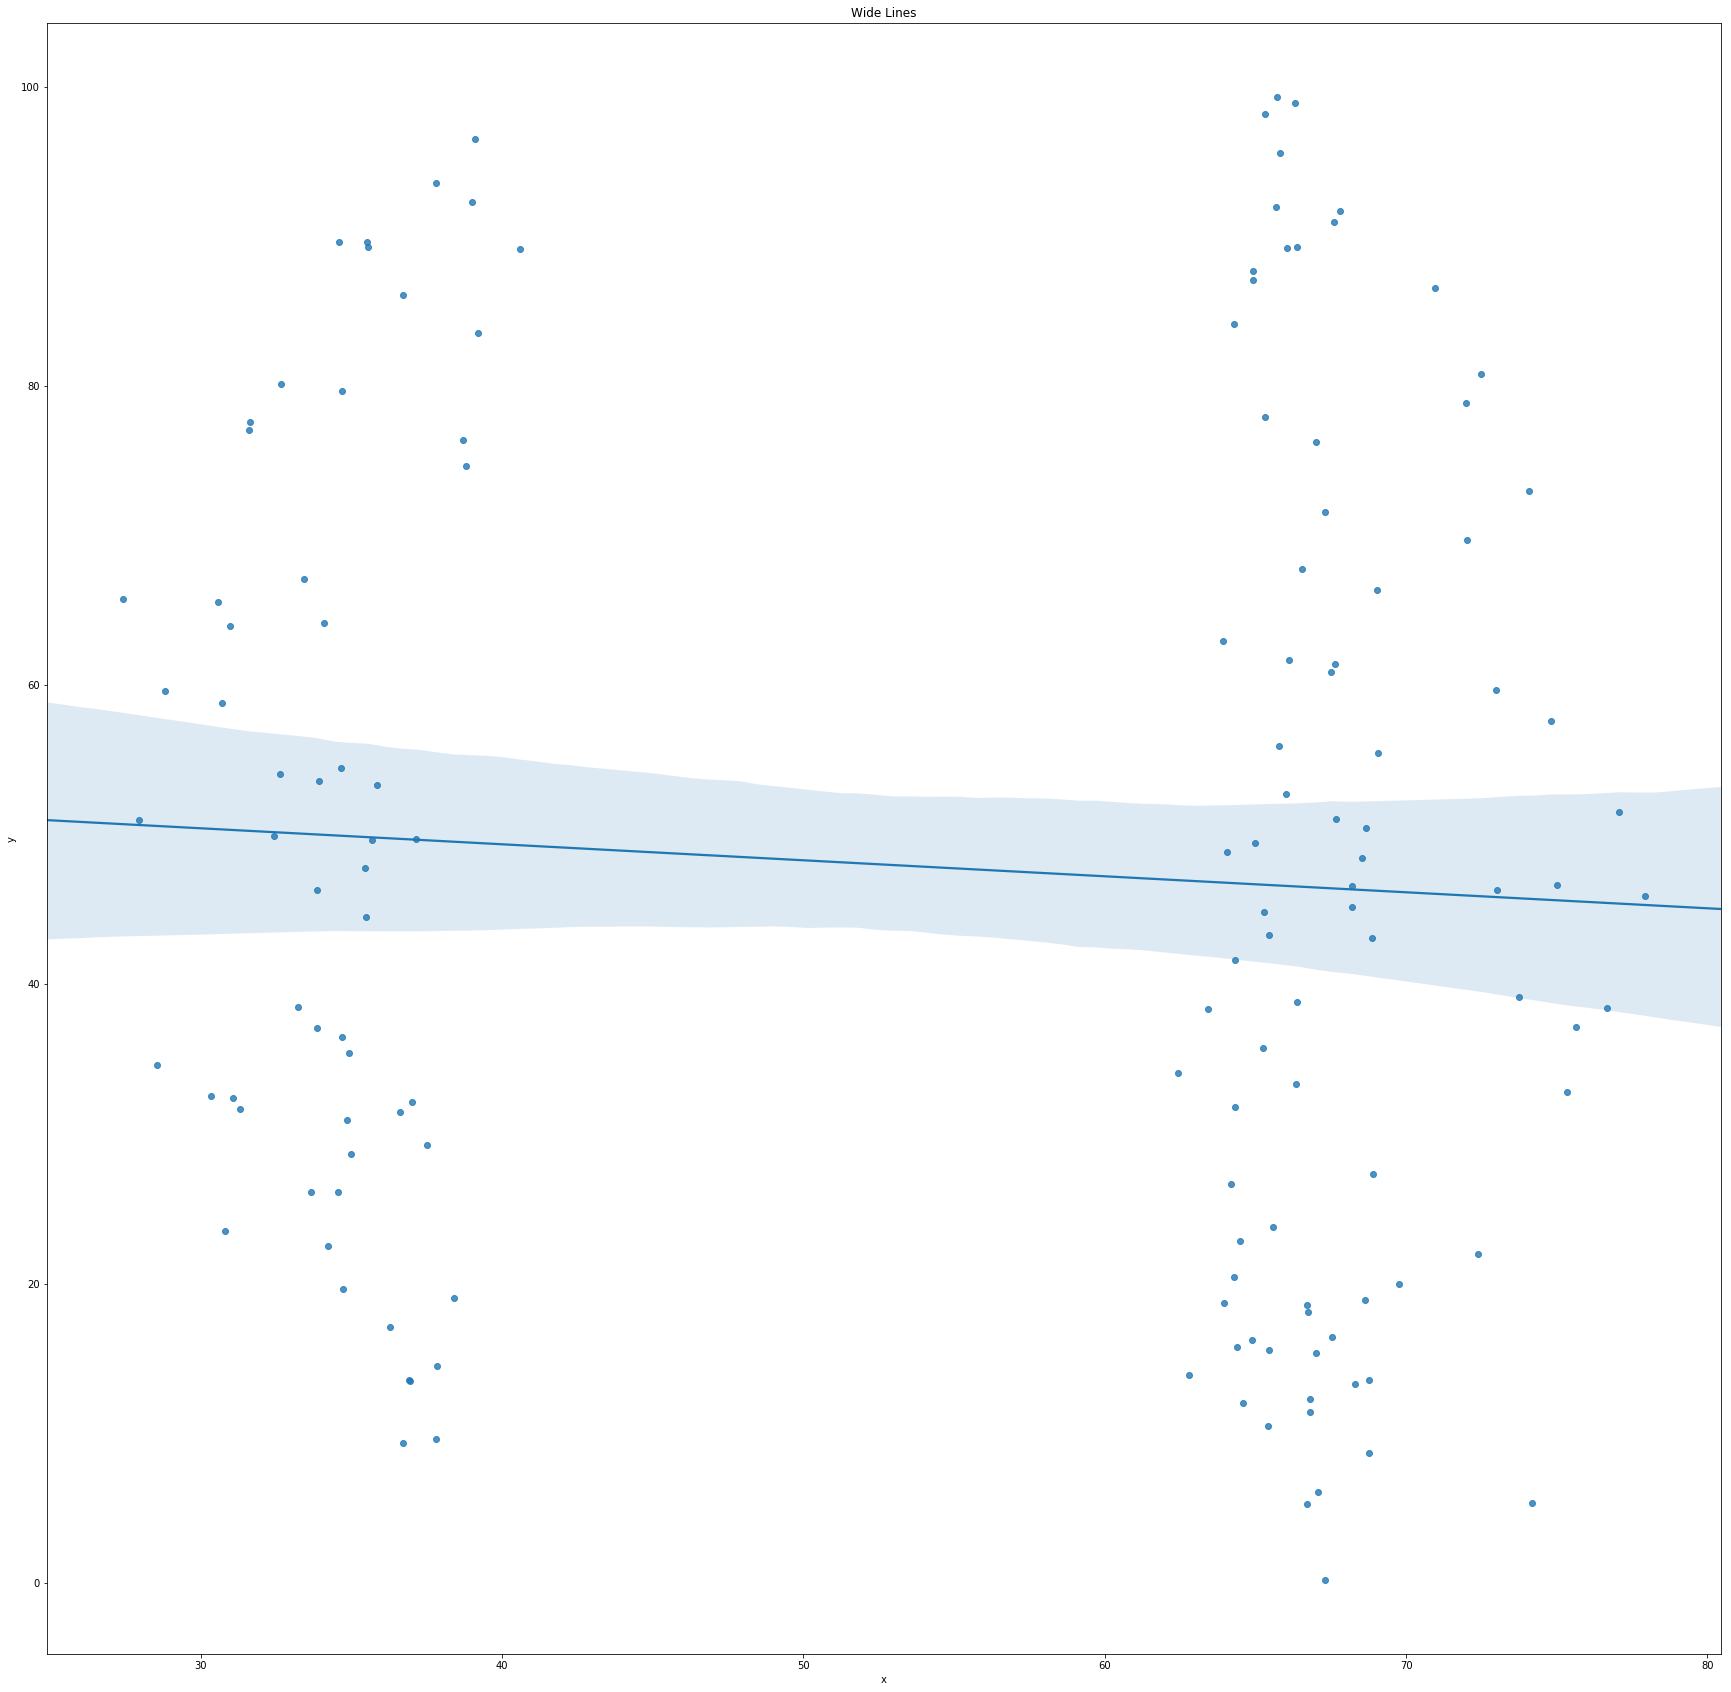

In [13]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = wide_linestable)
plt.title("Wide Lines")

In [44]:
f1 = "y~x"
model = ols(formula = f1, data = wide_linestable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6233
Date:                Sun, 12 May 2019   Prob (F-statistic):              0.431
Time:                        23:10:39   Log-Likelihood:                -668.35
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6349      7.691      6.973      0.000      38.428      68.841
x             -0.1069      0.135     -0.789      0.431      -0.375       0.161
==============================================================================
Omnibus:                       30.522   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.362
Skew:                           0.271   Prob(JB):                       0.0153
Kurtosis:                       1.942   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Slant down subset

Text(0.5, 1.0, 'Slant Down')

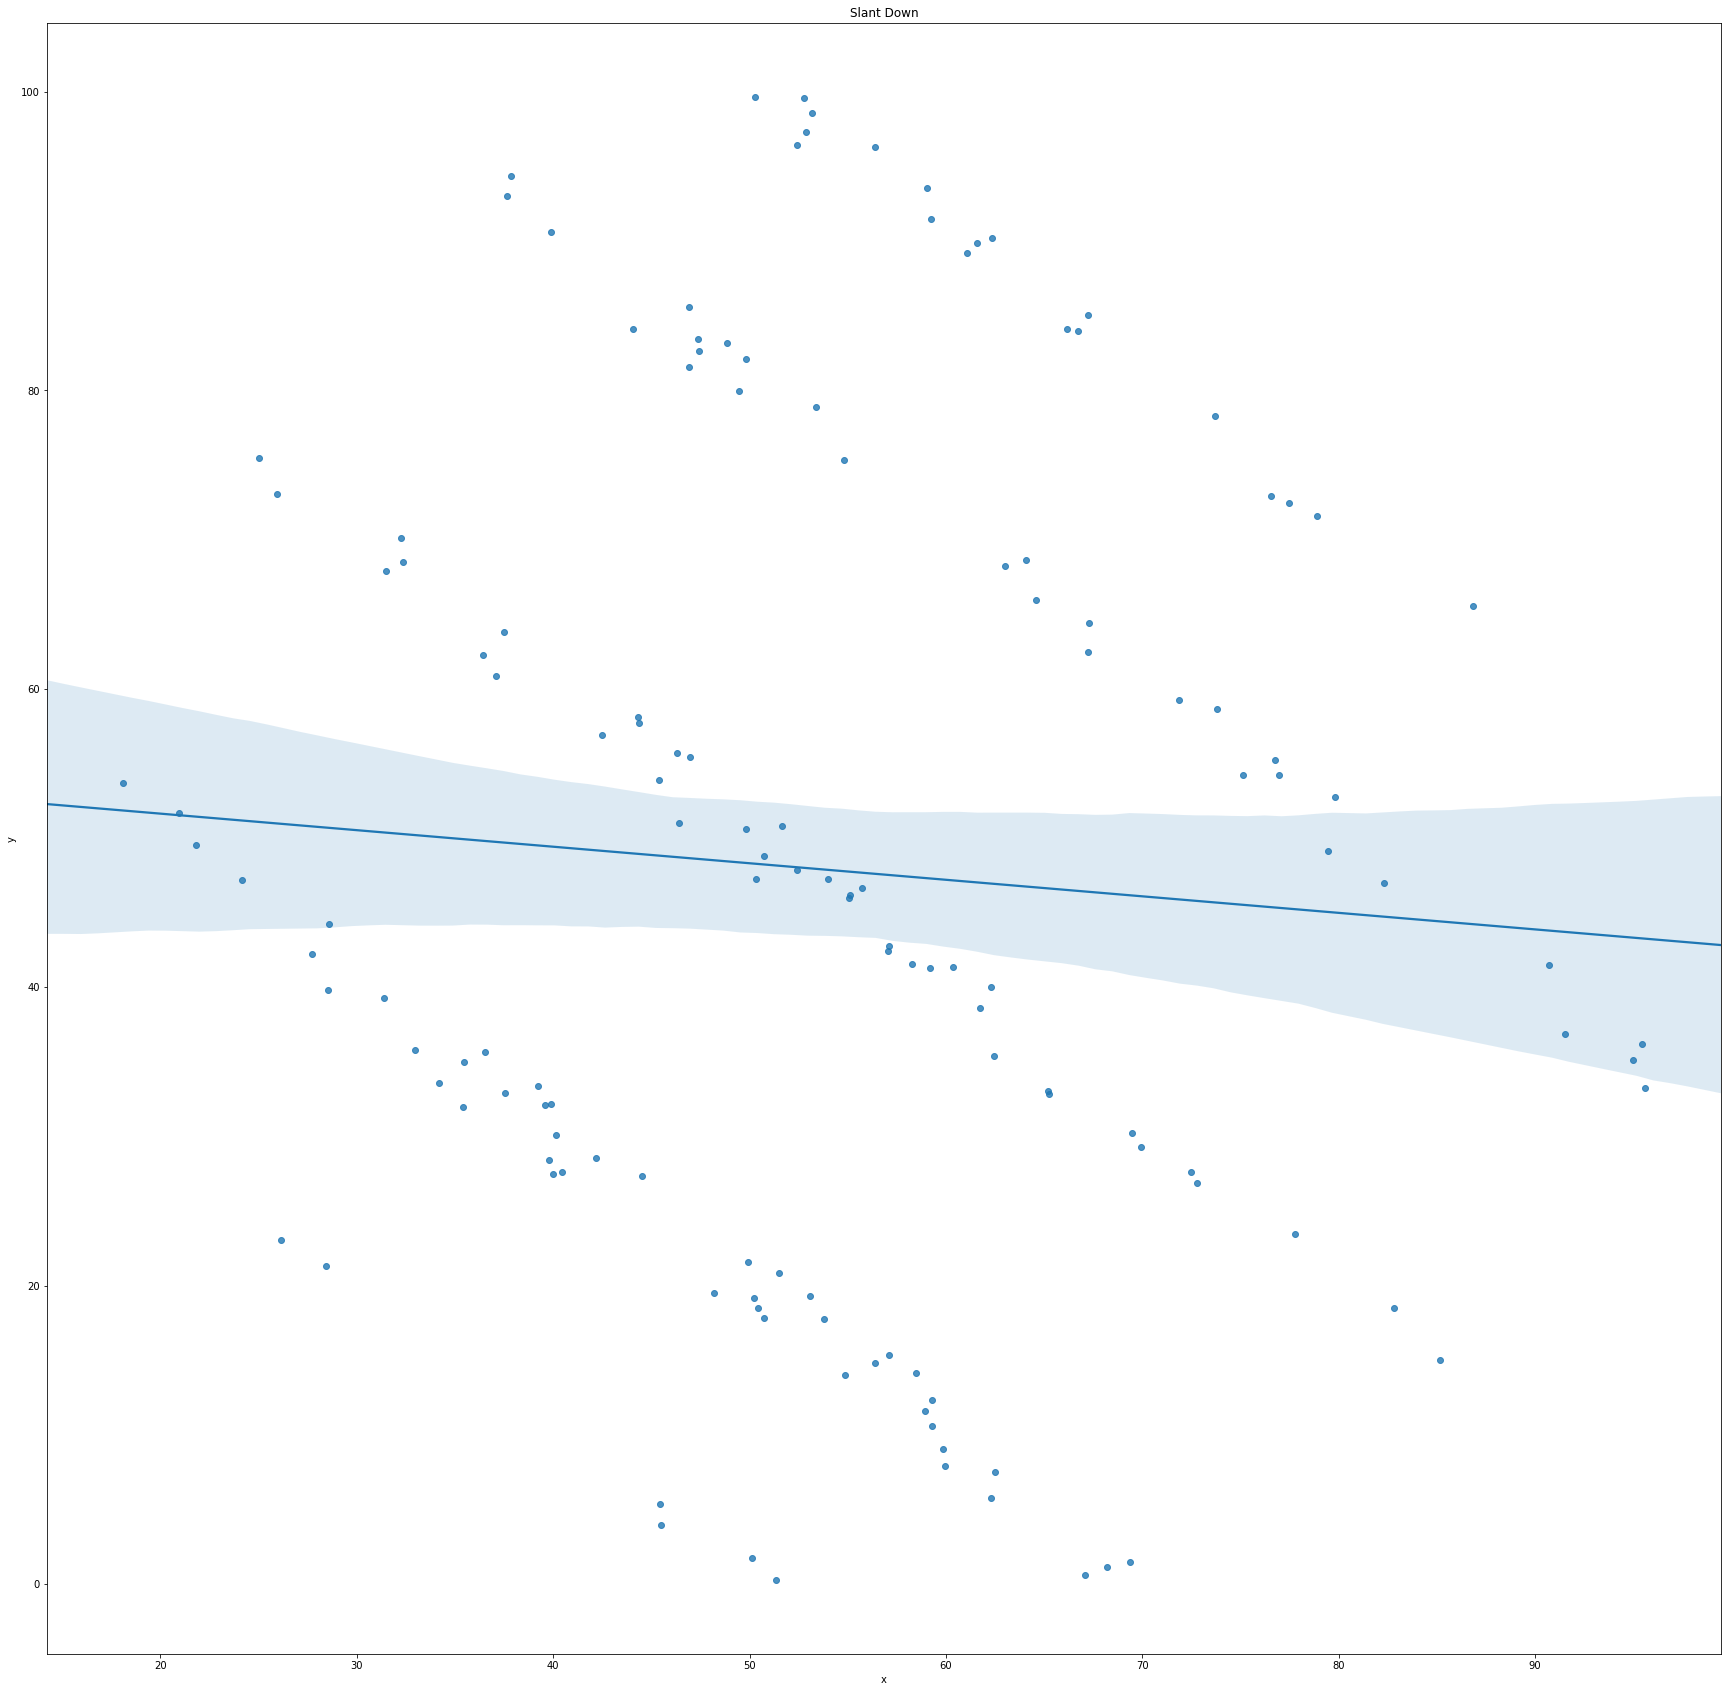

In [15]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = slant_downtable)
plt.title("Slant Down")

In [14]:
slant_downtable = tablesaur.loc[tablesaur["dataset"] == "slant_down"]
slant_downtable.drop('dataset', axis = 1).head()

,x,y
1562,52.872021,97.343223
1563,59.014144,93.574875
1564,56.375109,96.305148
1565,37.839200,94.359444
1566,39.885373,90.634662


In [45]:
f1 = "y~x"
model = ols(formula = f1, data = slant_downtable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6693
Date:                Sun, 12 May 2019   Prob (F-statistic):              0.415
Time:                        23:12:07   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8497      7.691      7.001      0.000      38.644      69.056
x             -0.1108      0.135     -0.818      0.415      -0.379       0.157
==============================================================================
Omnibus:                       17.797   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.128
Skew:                           0.198   Prob(JB):                       0.0467
Kurtosis:                       2.062   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Slant up subset with amalgamation paradox

In [30]:
slant_uptable = tablesaur.loc[tablesaur["dataset"] == "slant_up"]
slant_uptable.drop('dataset', axis = 1).head()

,x,y
1420,47.695201,95.241187
1421,44.609976,93.075835
1422,43.856381,94.085872
1423,41.578929,90.303567
1424,49.177419,96.610532


Text(0.5, 1.0, 'Slant Up')

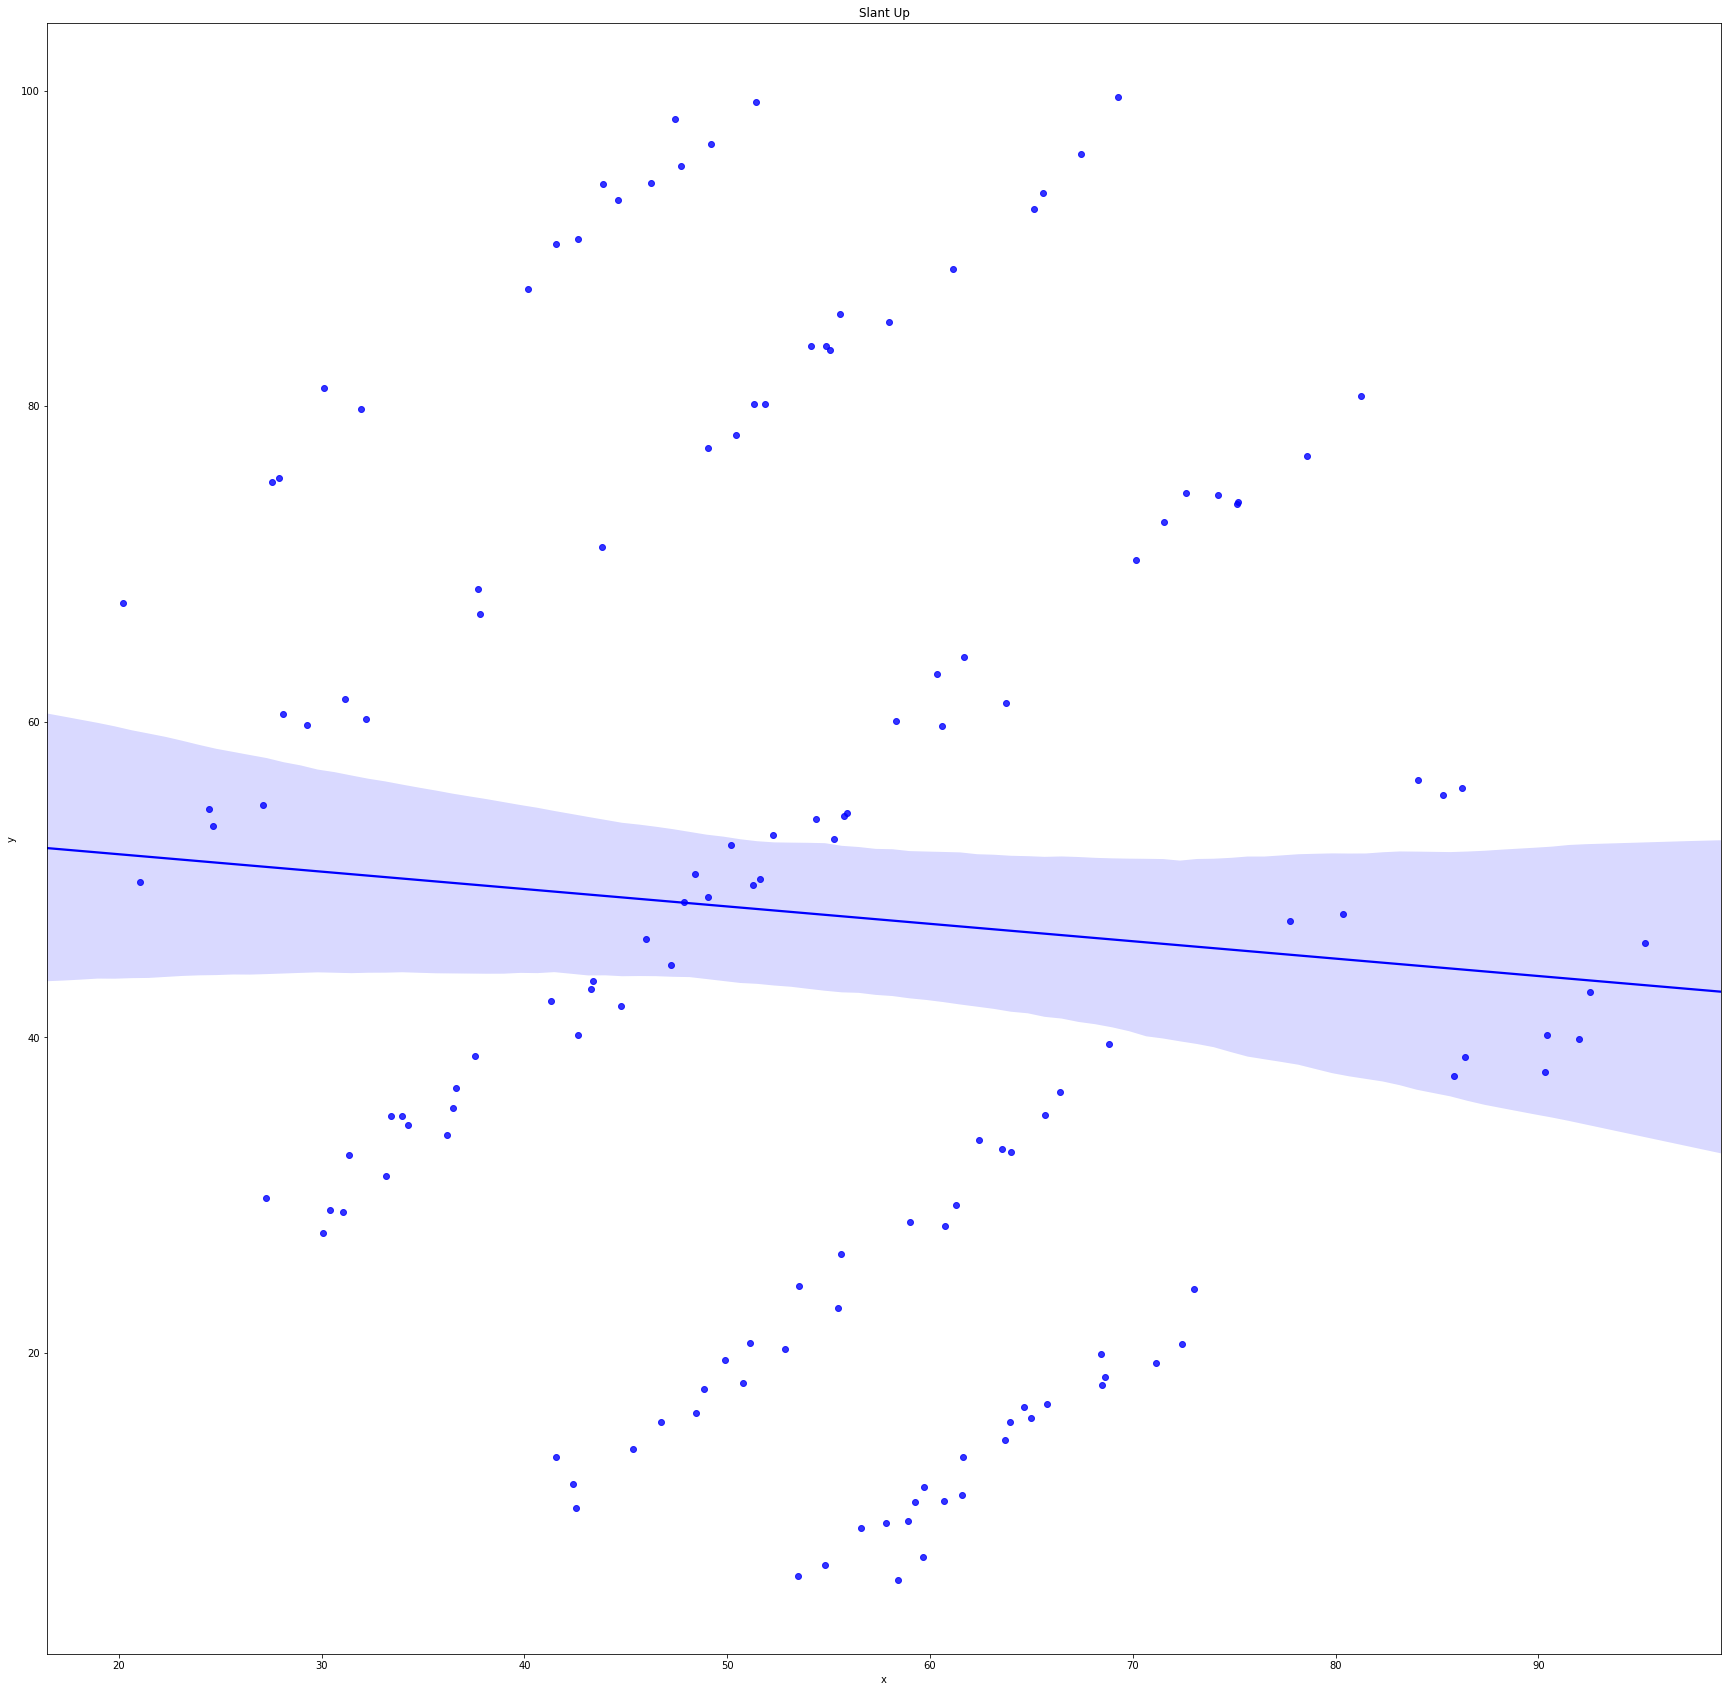

In [94]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = slant_uptable, color = 'b')
plt.title("Slant Up")

In [46]:
f1 = "y~x"
model = ols(formula = f1, data = slant_uptable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6621
Date:                Sun, 12 May 2019   Prob (F-statistic):              0.417
Time:                        23:12:47   Log-Likelihood:                -668.34
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8126      7.691      6.997      0.000      38.607      69.018
x             -0.1102      0.135     -0.814      0.417      -0.378       0.158
==============================================================================
Omnibus:                       31.038   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.330
Skew:                           0.264   Prob(JB):                       0.0155
Kurtosis:                       1.937   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
one_line = slant_uptable.iloc[20:40]


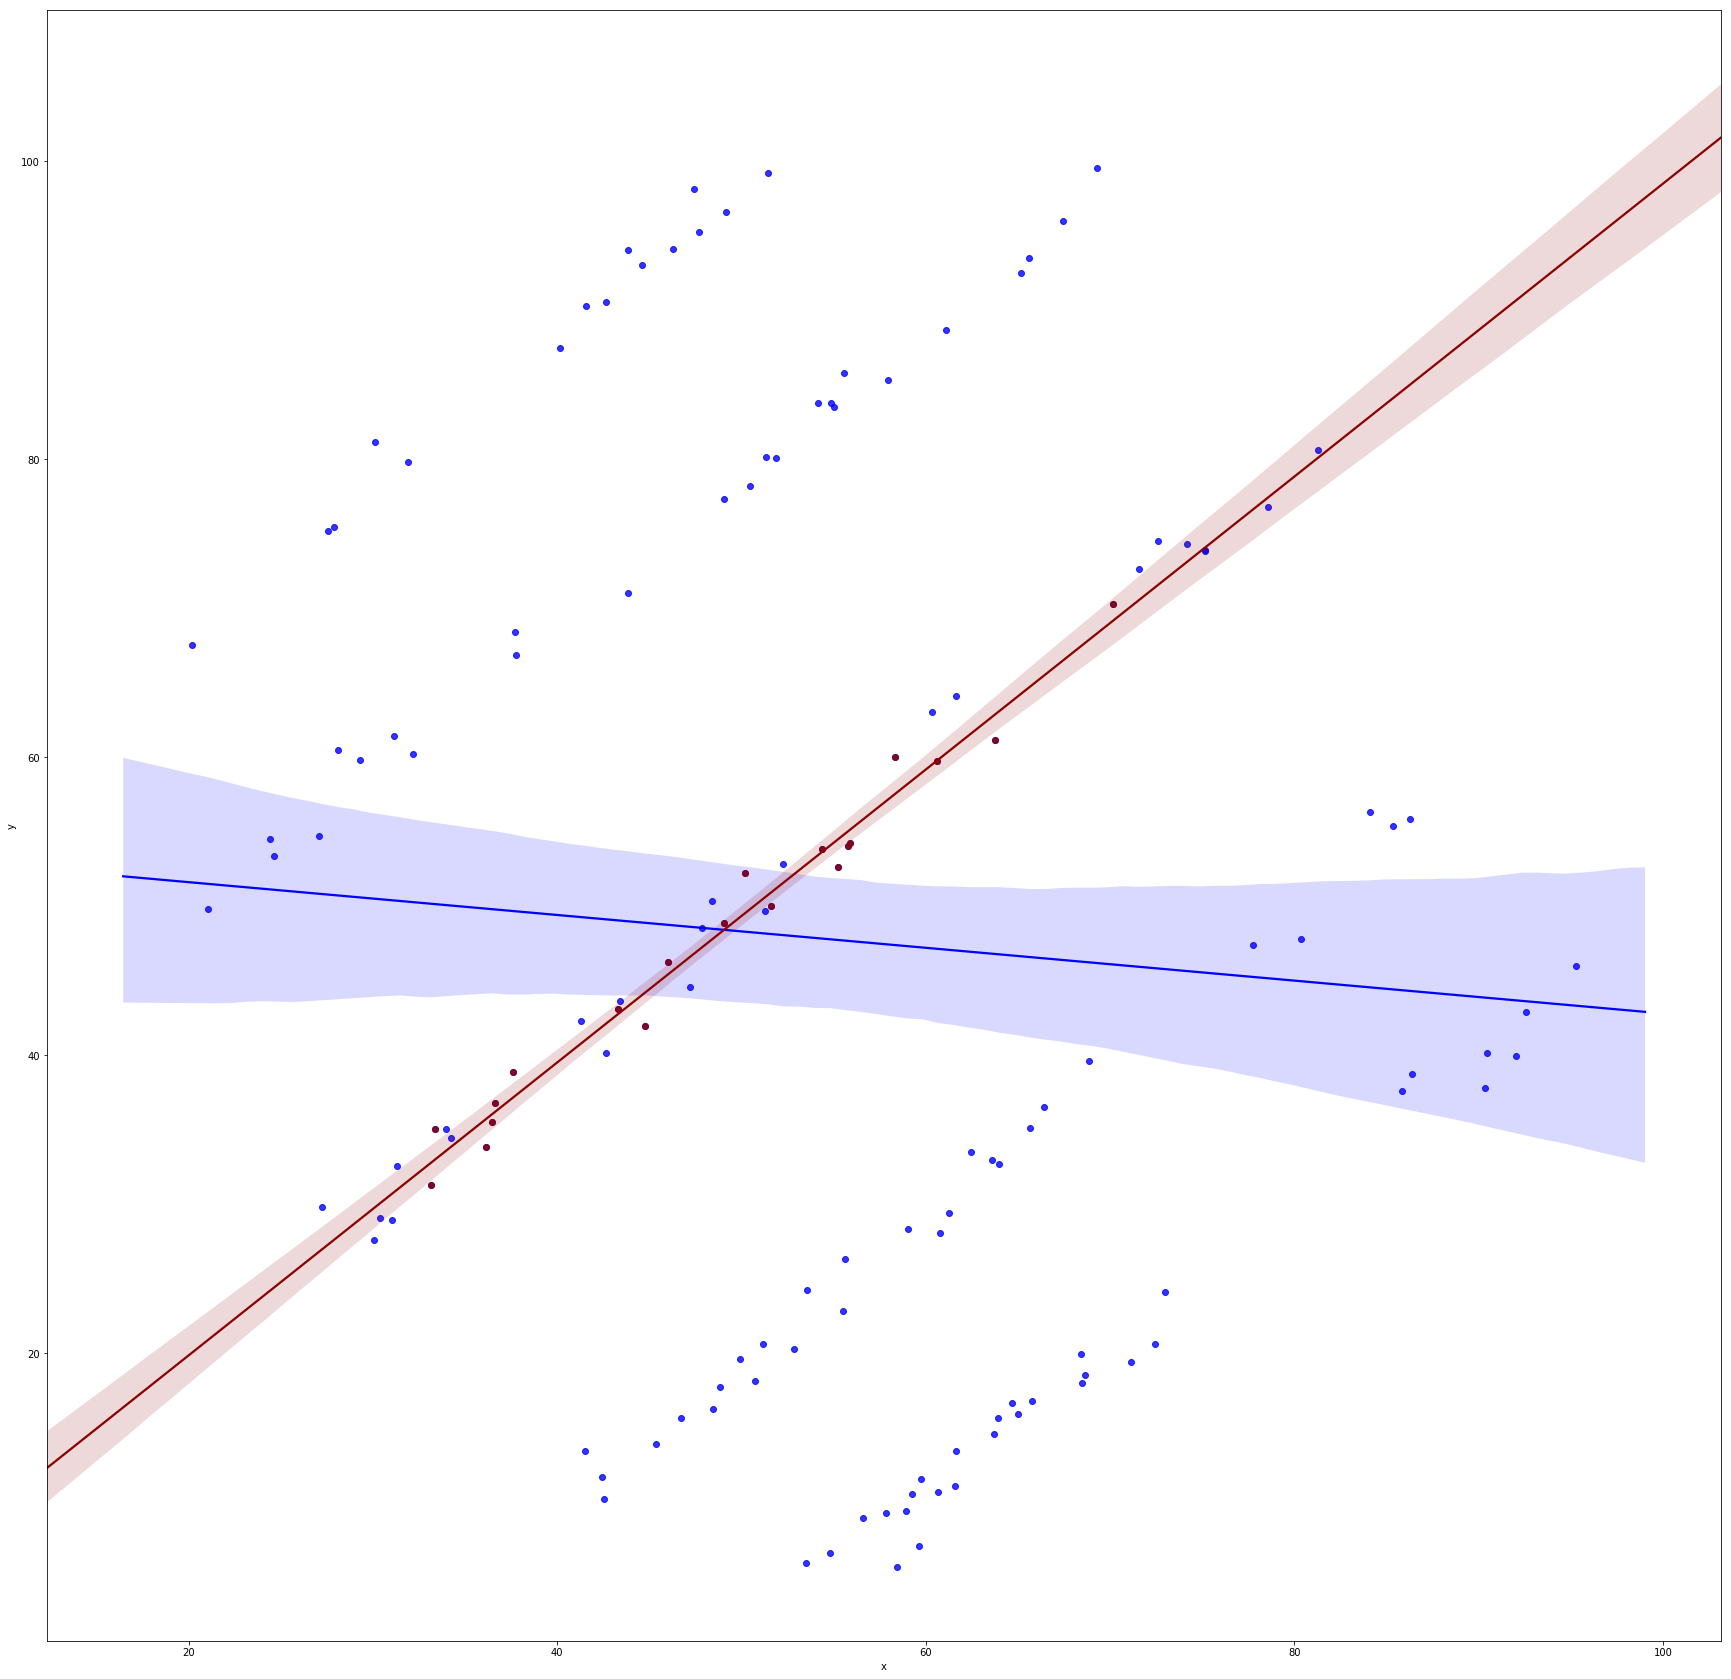

In [97]:
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = slant_uptable, color = 'b')
sns.regplot(x = "x", y = "y", data = one_line, color = 'darkred')


In [81]:
f1 = "y~x"
model = ols(formula = f1, data = one_line).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     843.1
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.90e-19
Time:                        00:29:34   Log-Likelihood:                -46.044
No. Observations:                  24   AIC:                             96.09
Df Residuals:                      22   BIC:                             98.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0216      1.617      0.632      0.534      -2.332       4.375
x              0.9666      0.033     29.036      0.000       0.898       1.036
==============================================================================
Omnibus:                        4.482   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                1.683
Skew:                           0.206   Prob(JB):                        0.431
Kurtosis:                       1.770   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bullseye subset

In [19]:
bullseyetable = tablesaur.loc[tablesaur["dataset"] == "bullseye"]
bullseyetable.drop('dataset', axis = 1).head()

,x,y
1278,51.203891,83.339777
1279,58.974470,85.499818
1280,51.872073,85.829738
1281,48.179931,85.045117
1282,41.683200,84.017941


Text(0.5, 1.0, 'BullsEye')

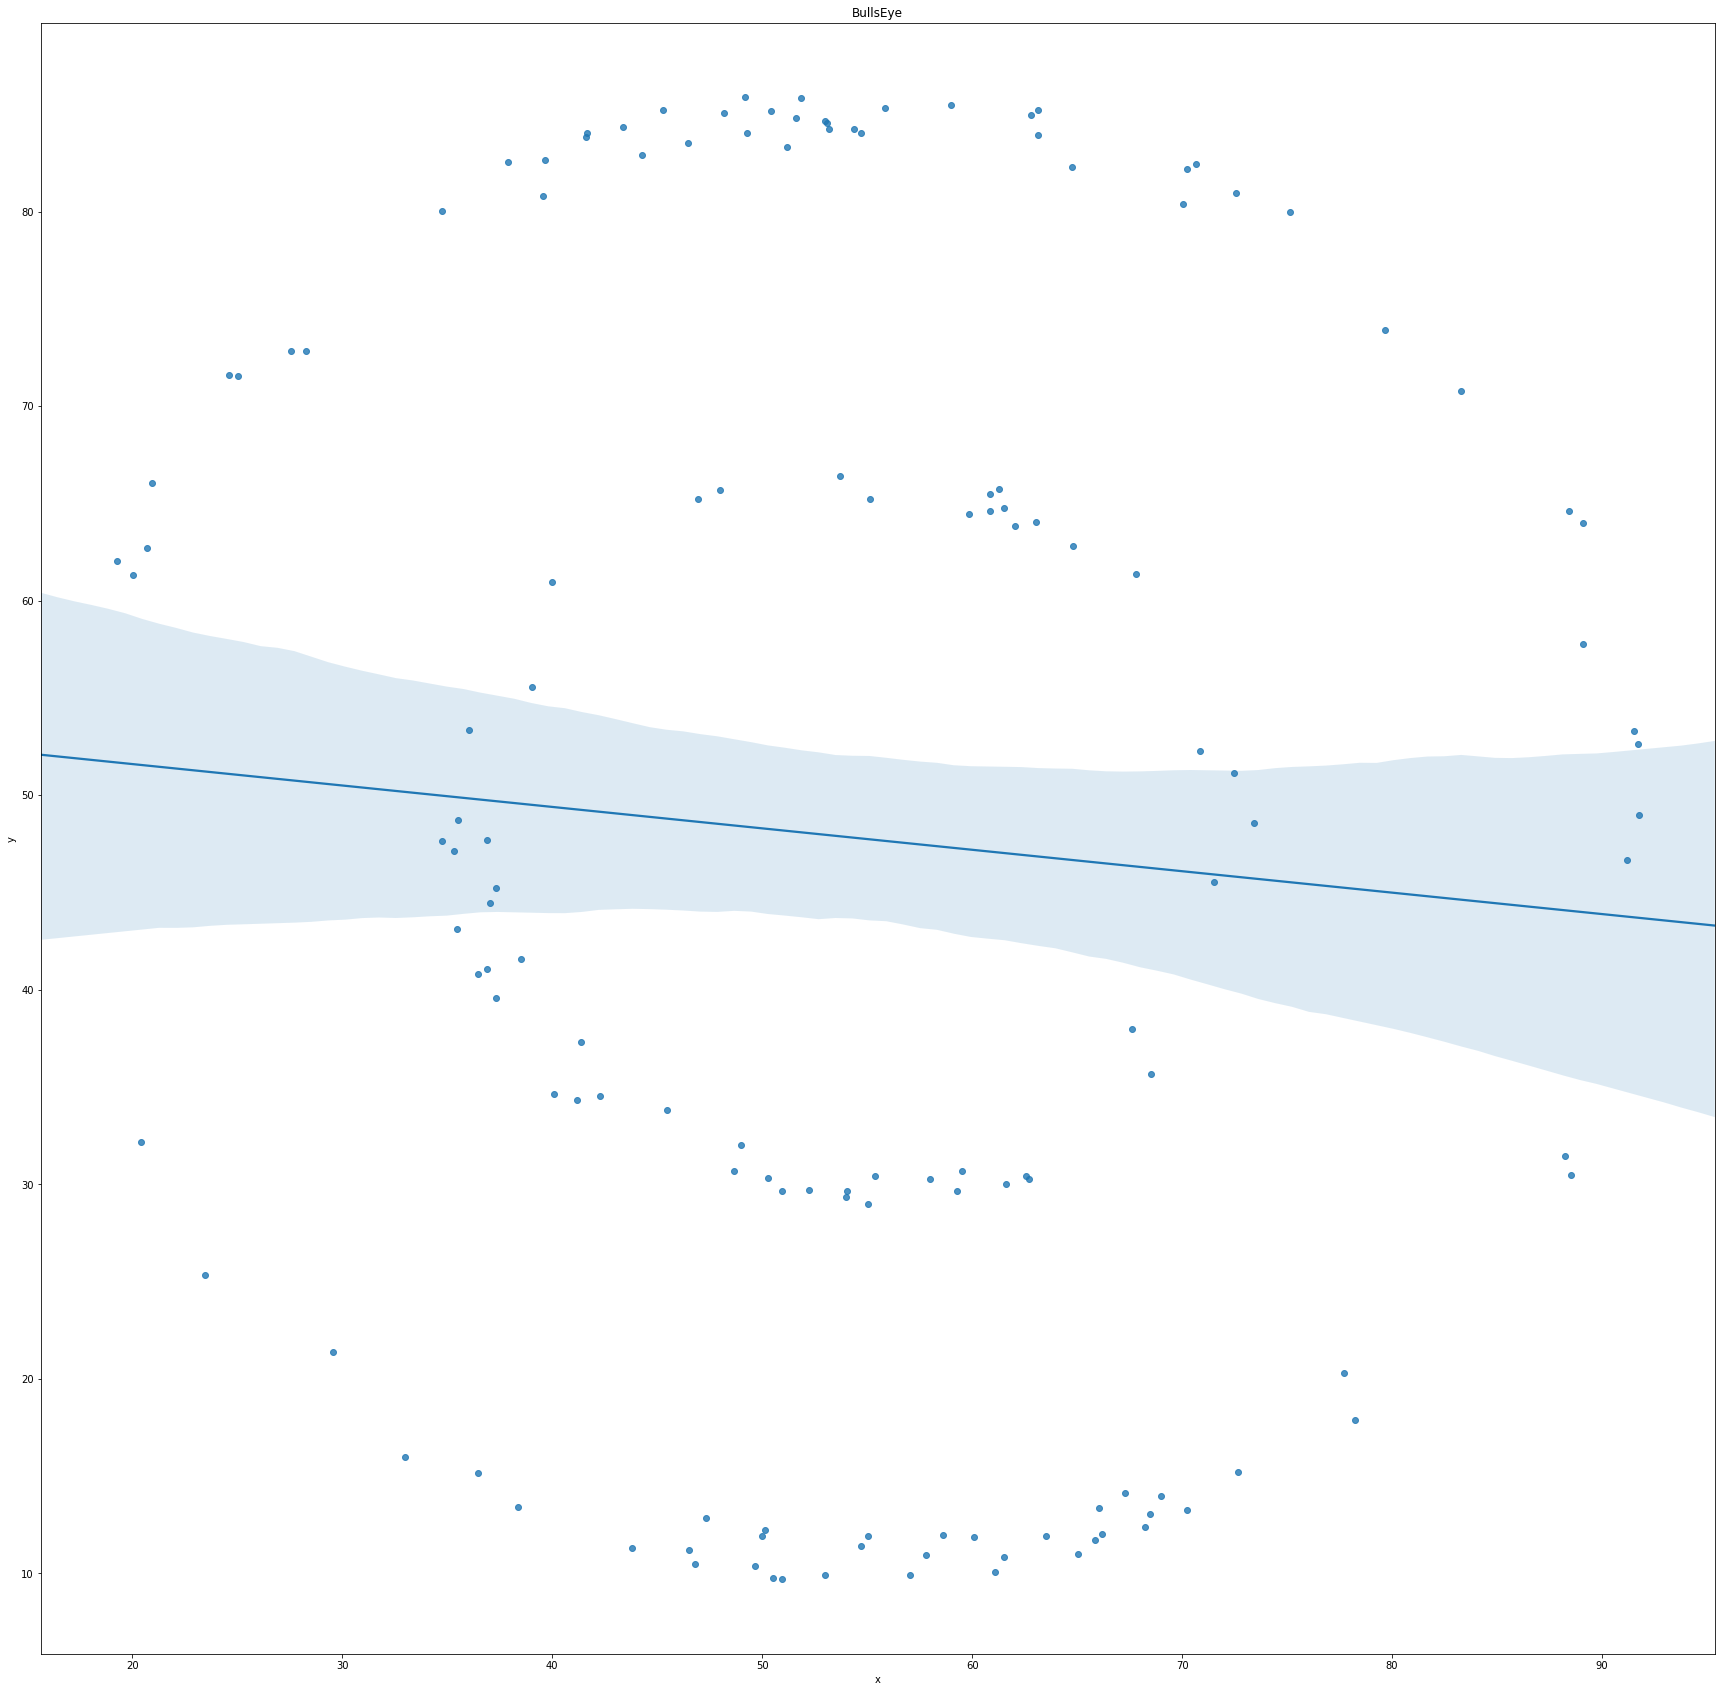

In [20]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = bullseyetable)
plt.title("BullsEye")

In [21]:
f1 = "y~x"
model = ols(formula = f1, data = bullseyetable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6617
Date:                Sun, 12 May 2019   Prob (F-statistic):              0.417
Time:                        22:47:28   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8095      7.690      6.997      0.000      38.605      69.014
x             -0.1102      0.135     -0.813      0.417      -0.378       0.158
==============================================================================
Omnibus:                      292.759   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.233
Skew:                           0.017   Prob(JB):                      0.00221
Kurtosis:                       1.563   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Circle subset

In [22]:
circletable = tablesaur.loc[tablesaur["dataset"] == "circle"]
circletable.drop('dataset', axis = 1).head()

,x,y
1136,55.993030,79.277264
1137,50.032254,79.013071
1138,51.288459,82.435940
1139,51.170537,79.165294
1140,44.377915,78.164628


Text(0.5, 1.0, 'Circle')

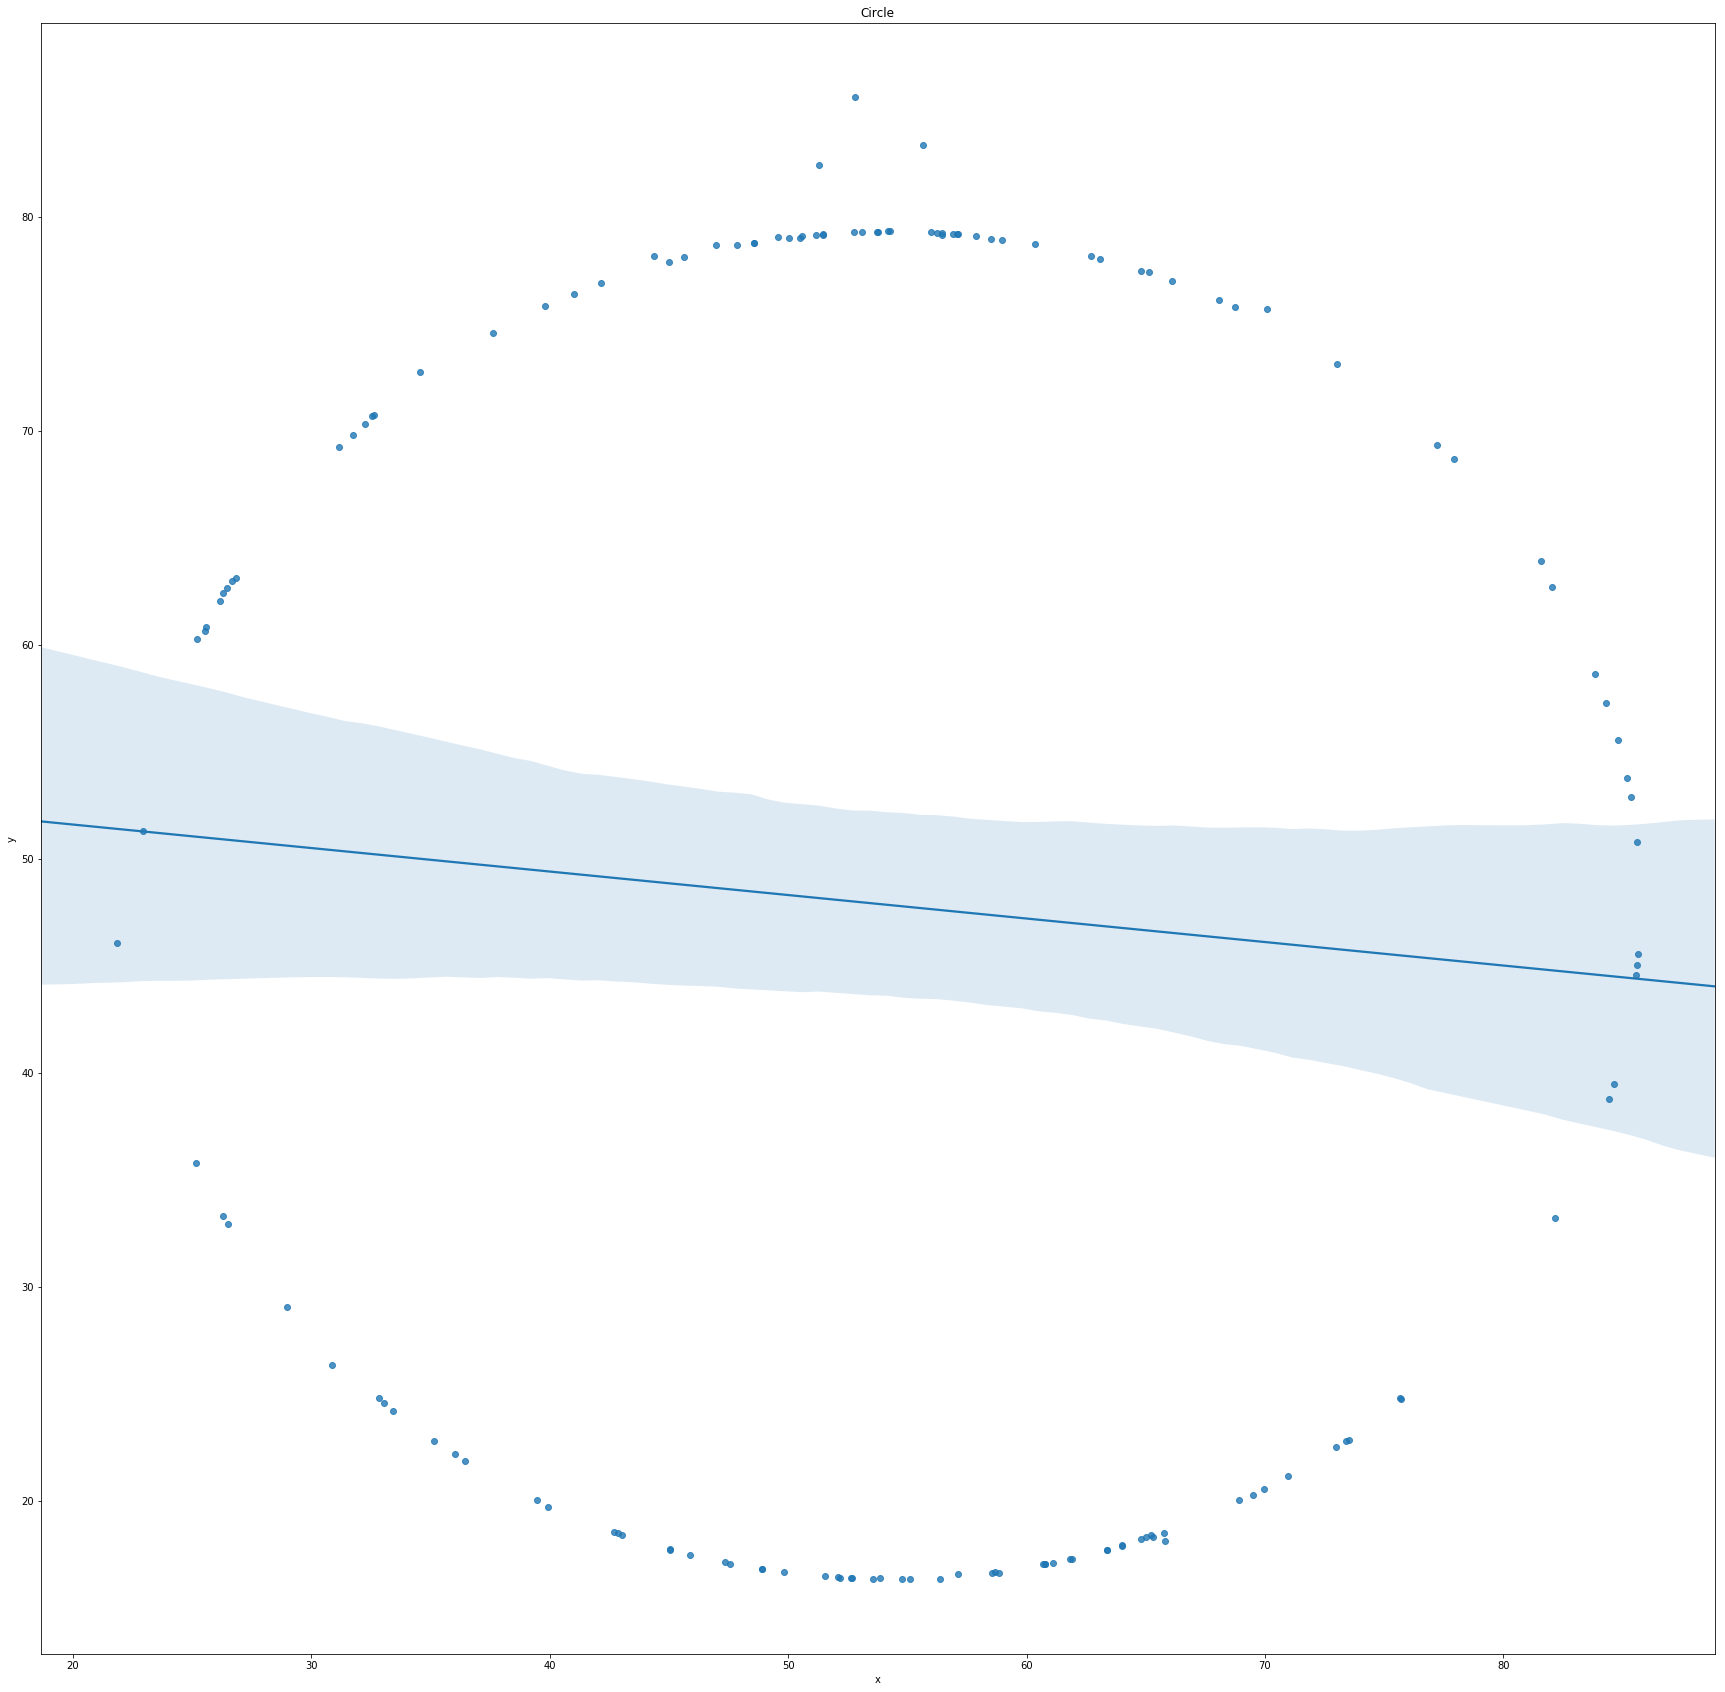

In [23]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = circletable)
plt.title("Circle")

## Dots subset

In [24]:
dotstable = tablesaur.loc[tablesaur["dataset"] == "dots"]
dotstable.drop('dataset', axis = 1).head()

,x,y
994,51.147917,90.867412
995,50.517126,89.102395
996,50.207480,85.460047
997,50.069482,83.057670
998,50.562846,82.937822


Text(0.5, 1.0, 'Dots')

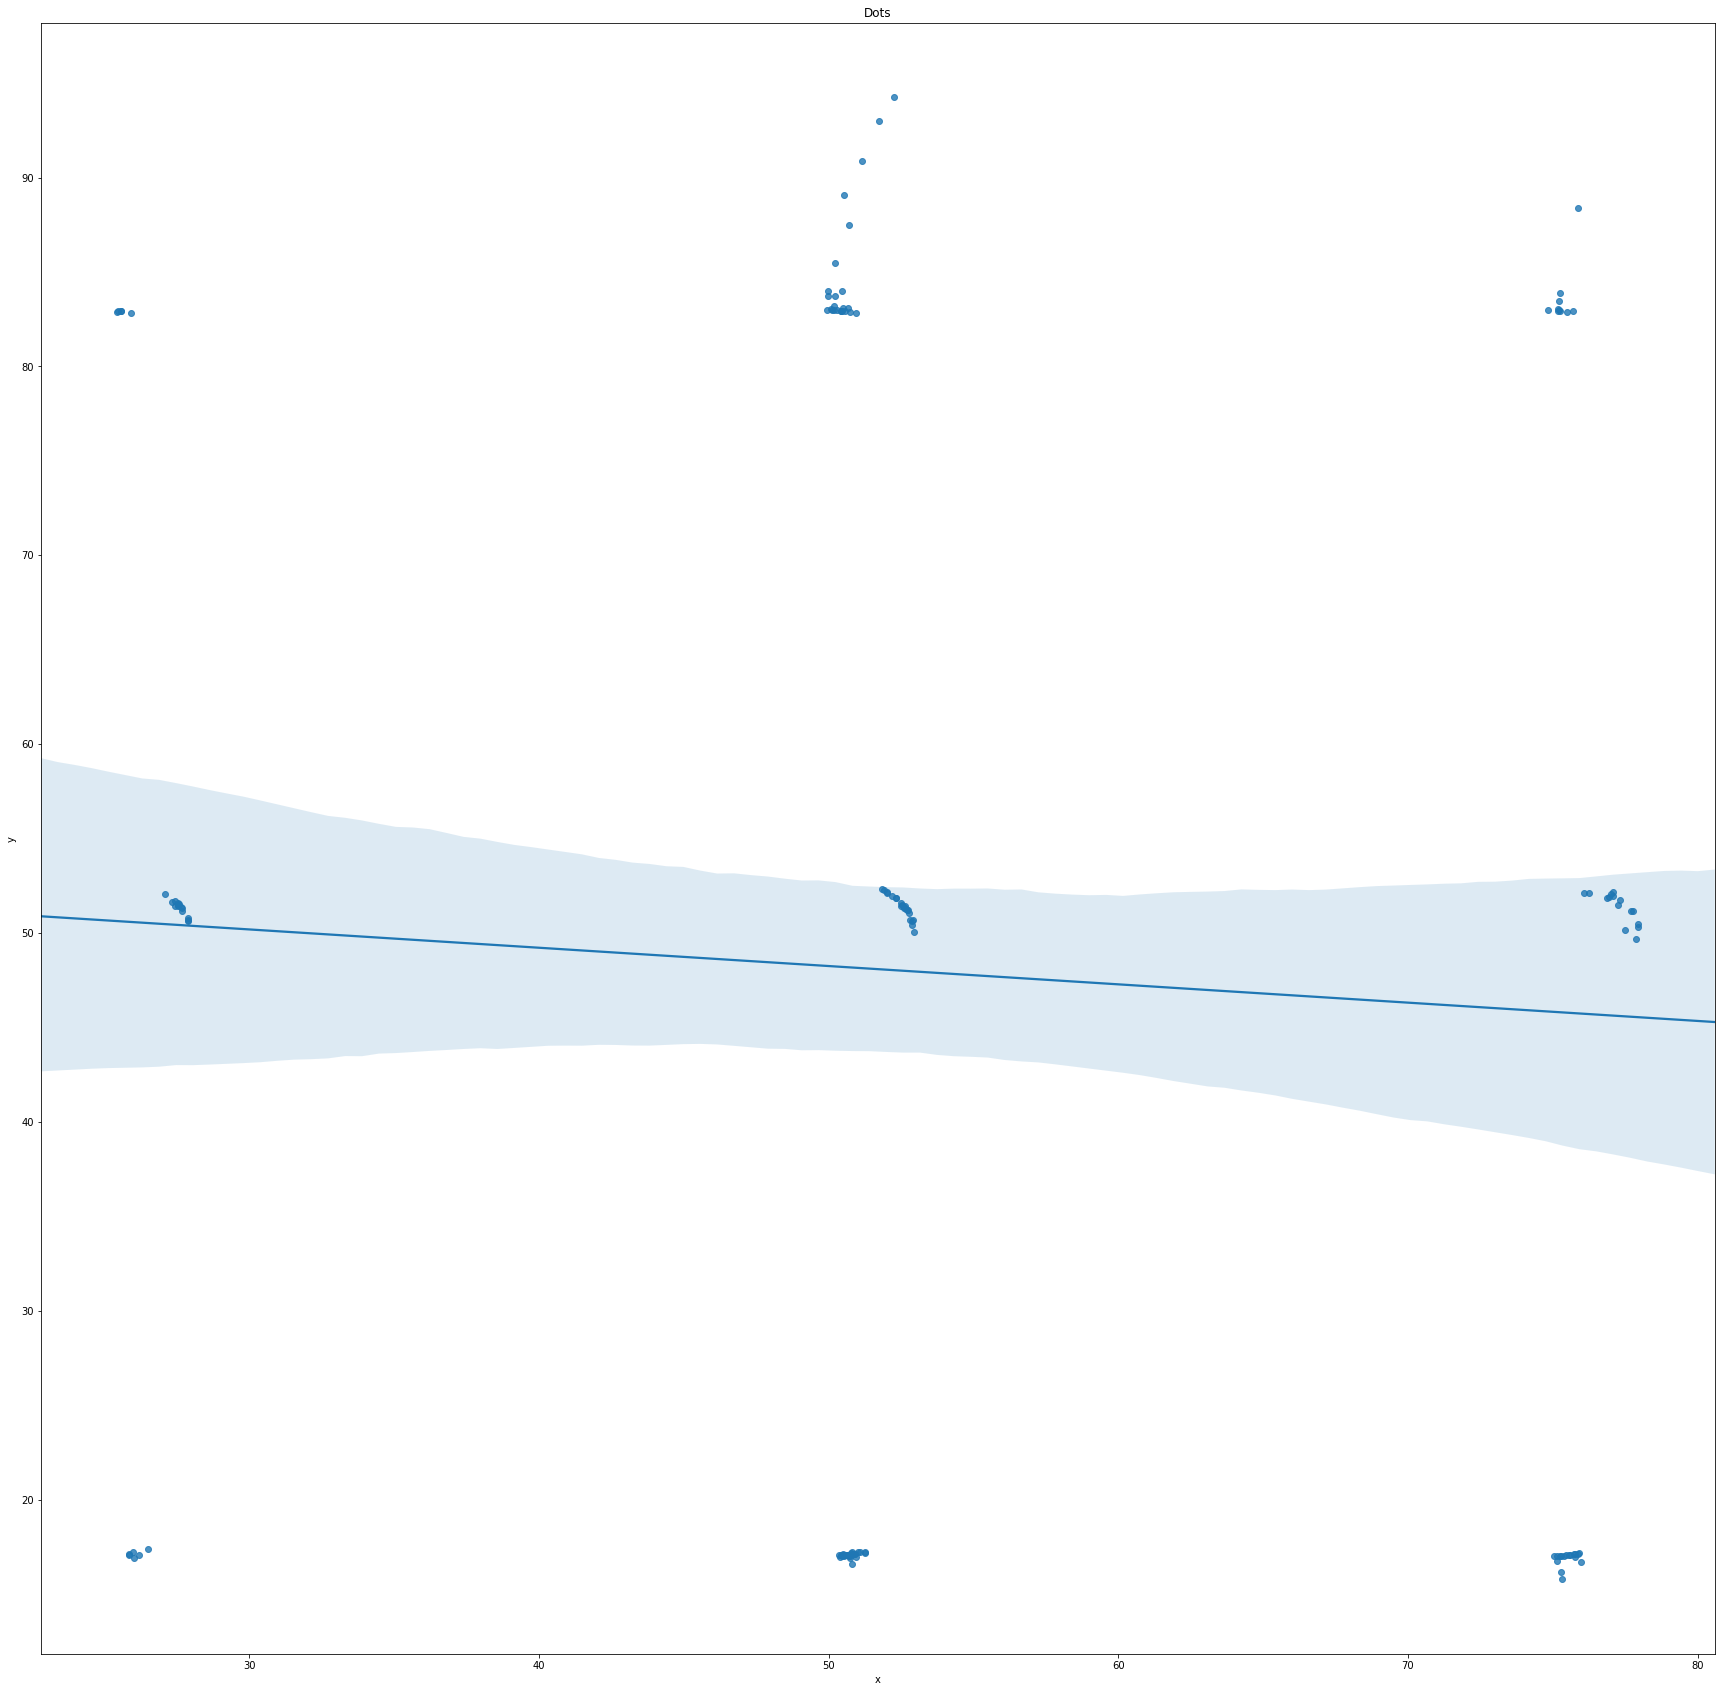

In [25]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = dotstable)
plt.title("Dots")

## High lines subset

In [26]:
high_linestable = tablesaur.loc[tablesaur["dataset"] == "high_lines"]
high_linestable.drop('dataset', axis = 1).head()

,x,y
852,57.613234,83.905171
853,51.274392,82.817983
854,50.753898,76.754129
855,37.021184,81.954470
856,42.881755,80.184770


Text(0.5, 1.0, 'High Lines')

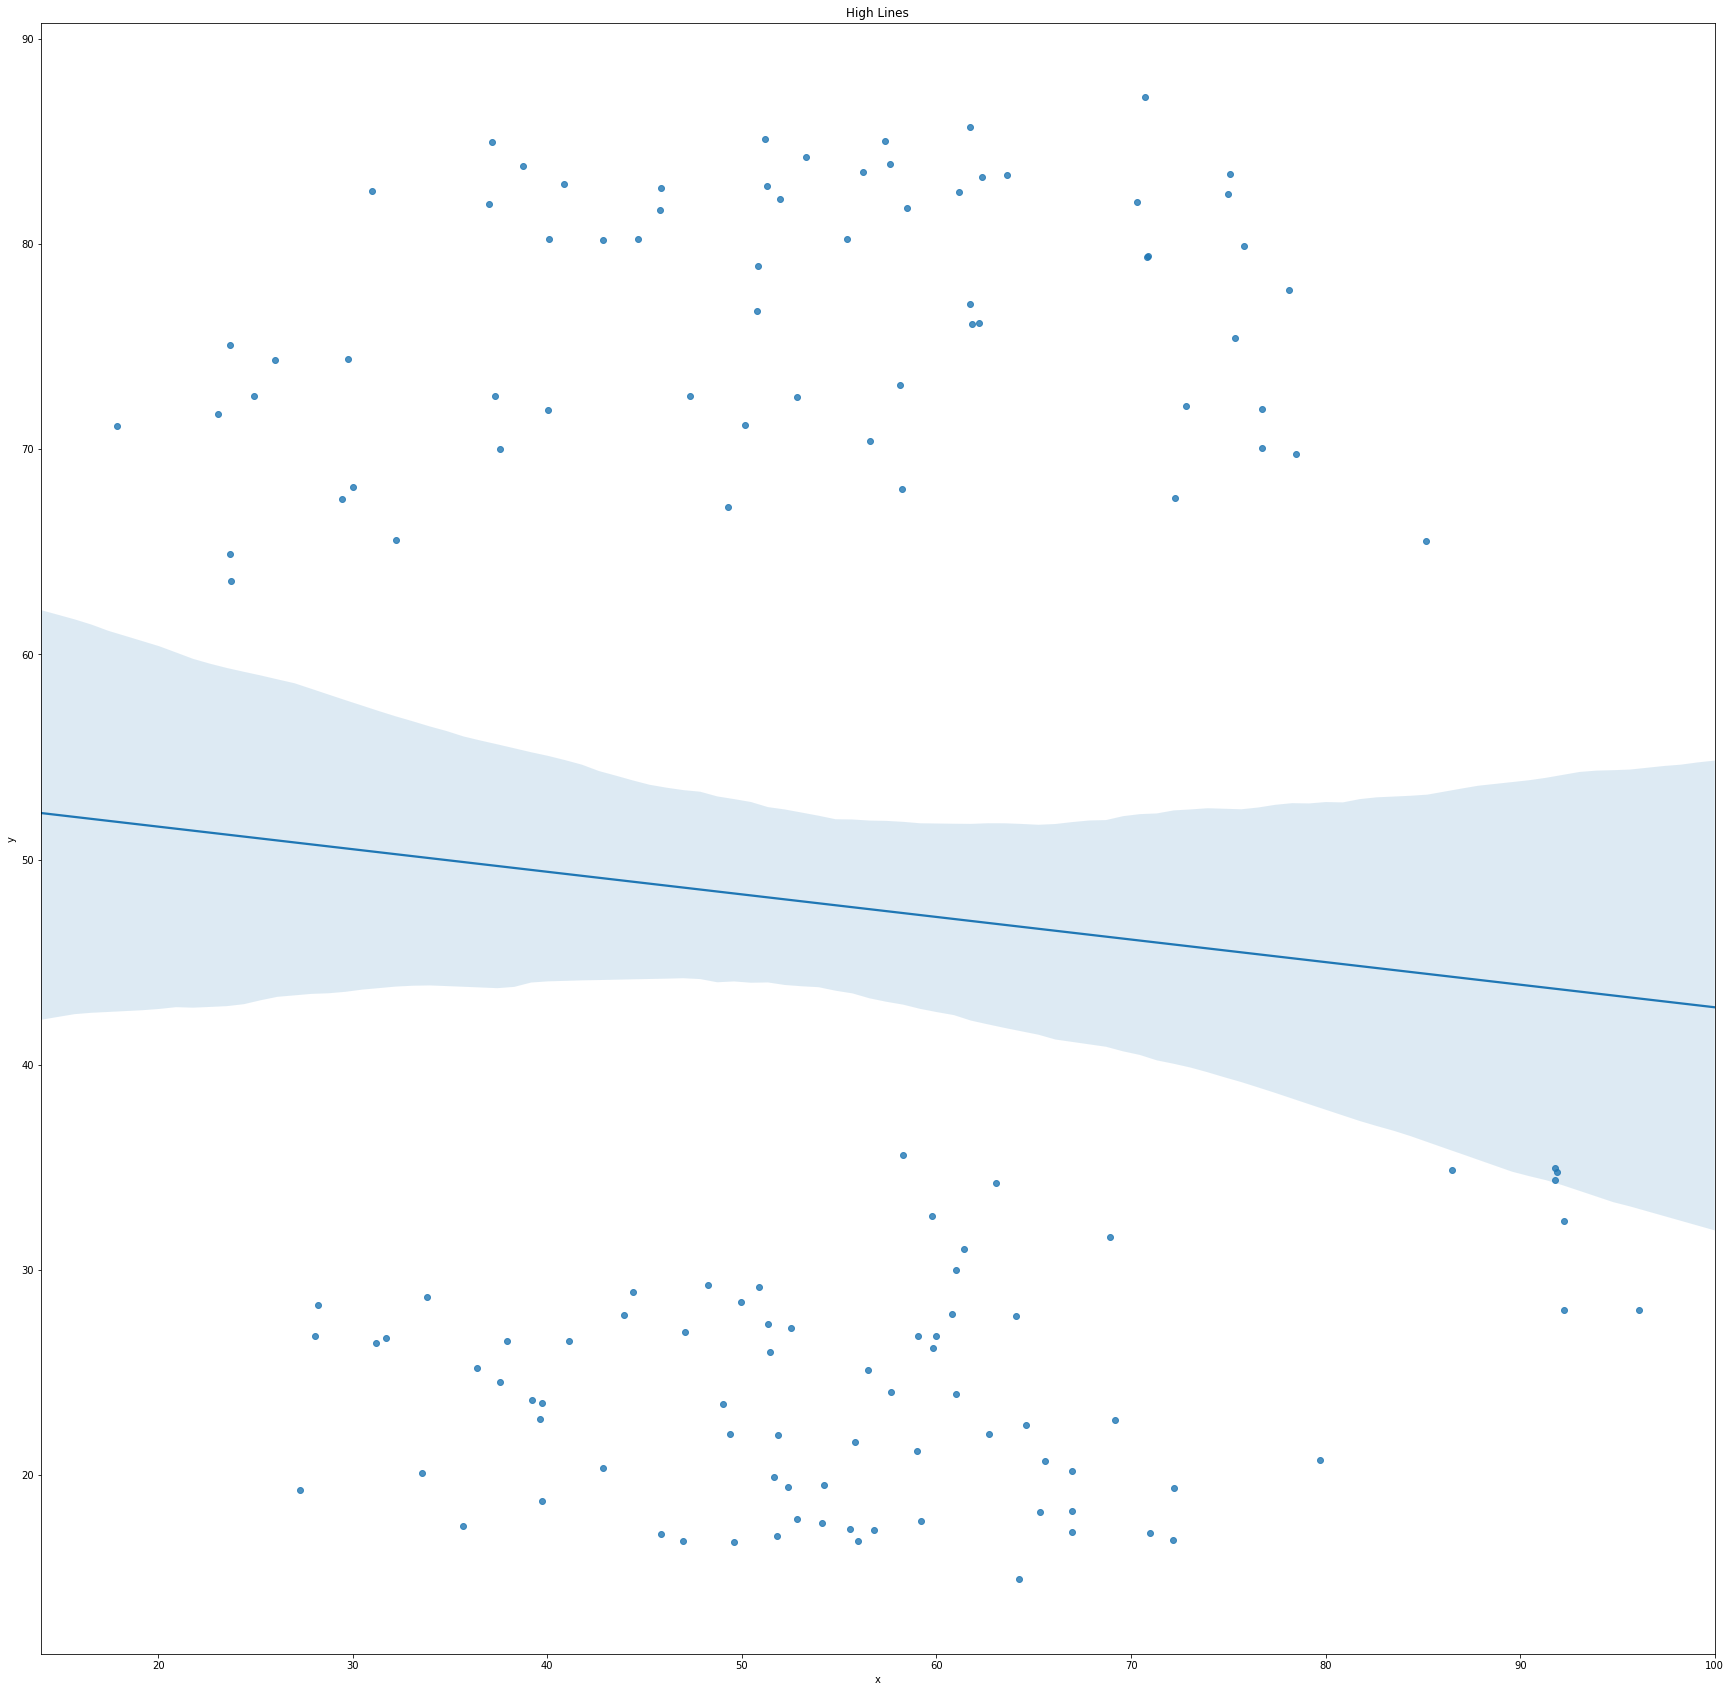

In [27]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = high_linestable)
plt.title("High Lines")

## Star subset

In [28]:
startable = tablesaur.loc[tablesaur["dataset"] == "star"]
startable.drop('dataset', axis = 1).head()

,x,y
710,58.213608,91.881892
711,58.196054,92.214989
712,58.718231,90.310532
713,57.278373,89.907607
714,58.082020,92.008145


Text(0.5, 1.0, 'Star')

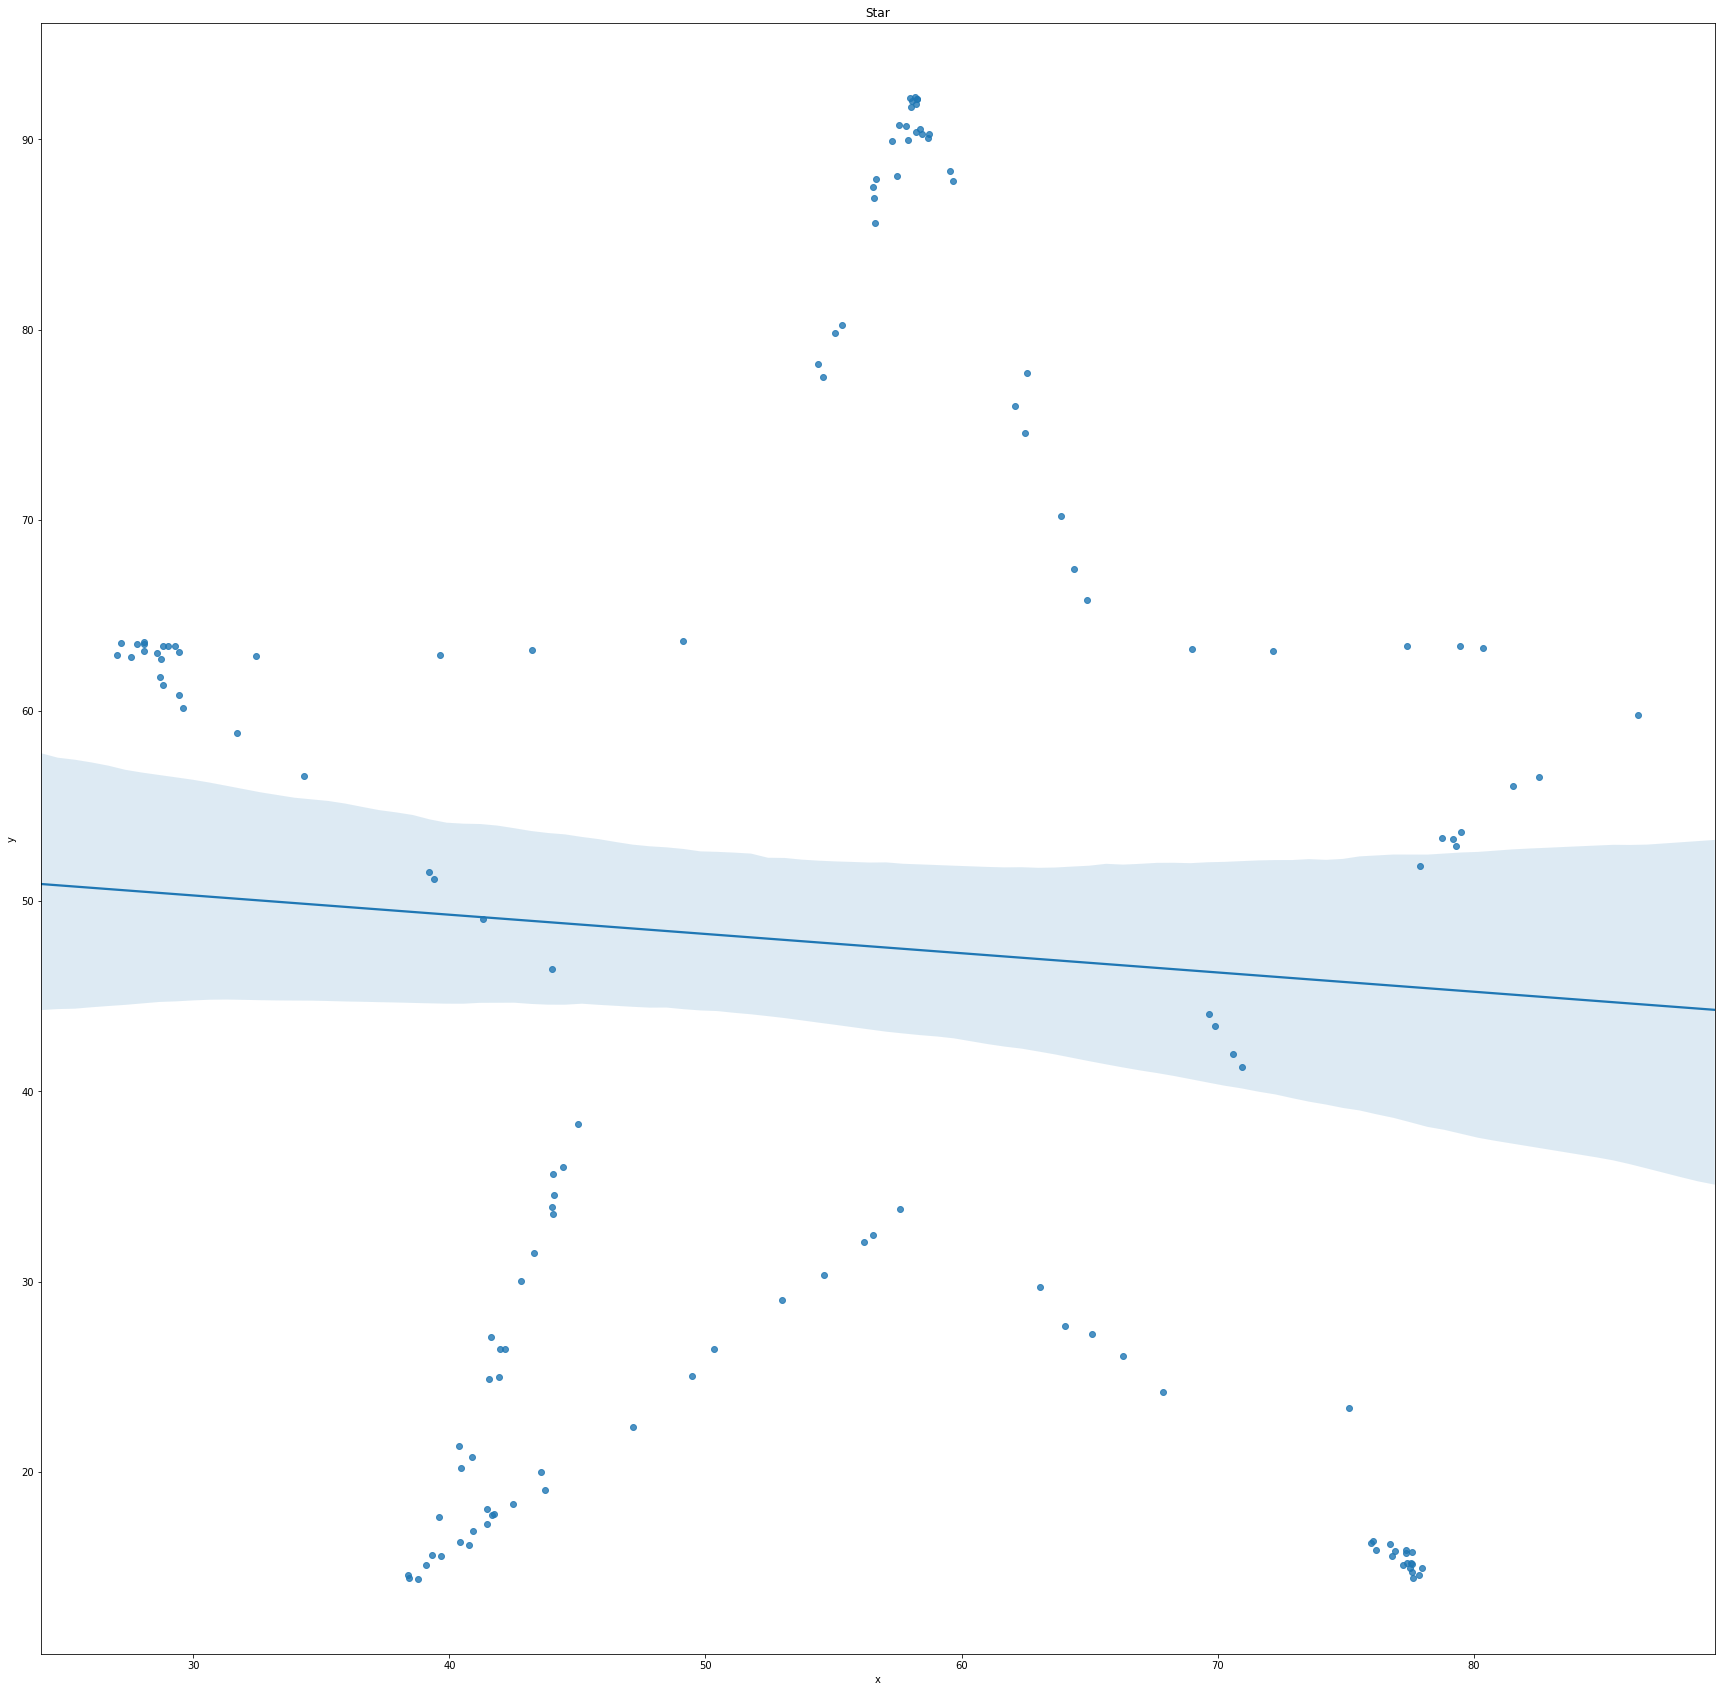

In [29]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = startable)
plt.title("Star")

## X subset

In [85]:
x_shapetable = tablesaur.loc[tablesaur["dataset"] == "x_shape"]
x_shapetable.drop('dataset', axis = 1).head()

,x,y
568,38.337757,92.472719
569,35.751871,94.116768
570,32.767218,88.518295
571,33.729607,88.622266
572,37.238249,83.724928


Text(0.5, 1.0, 'X shape')

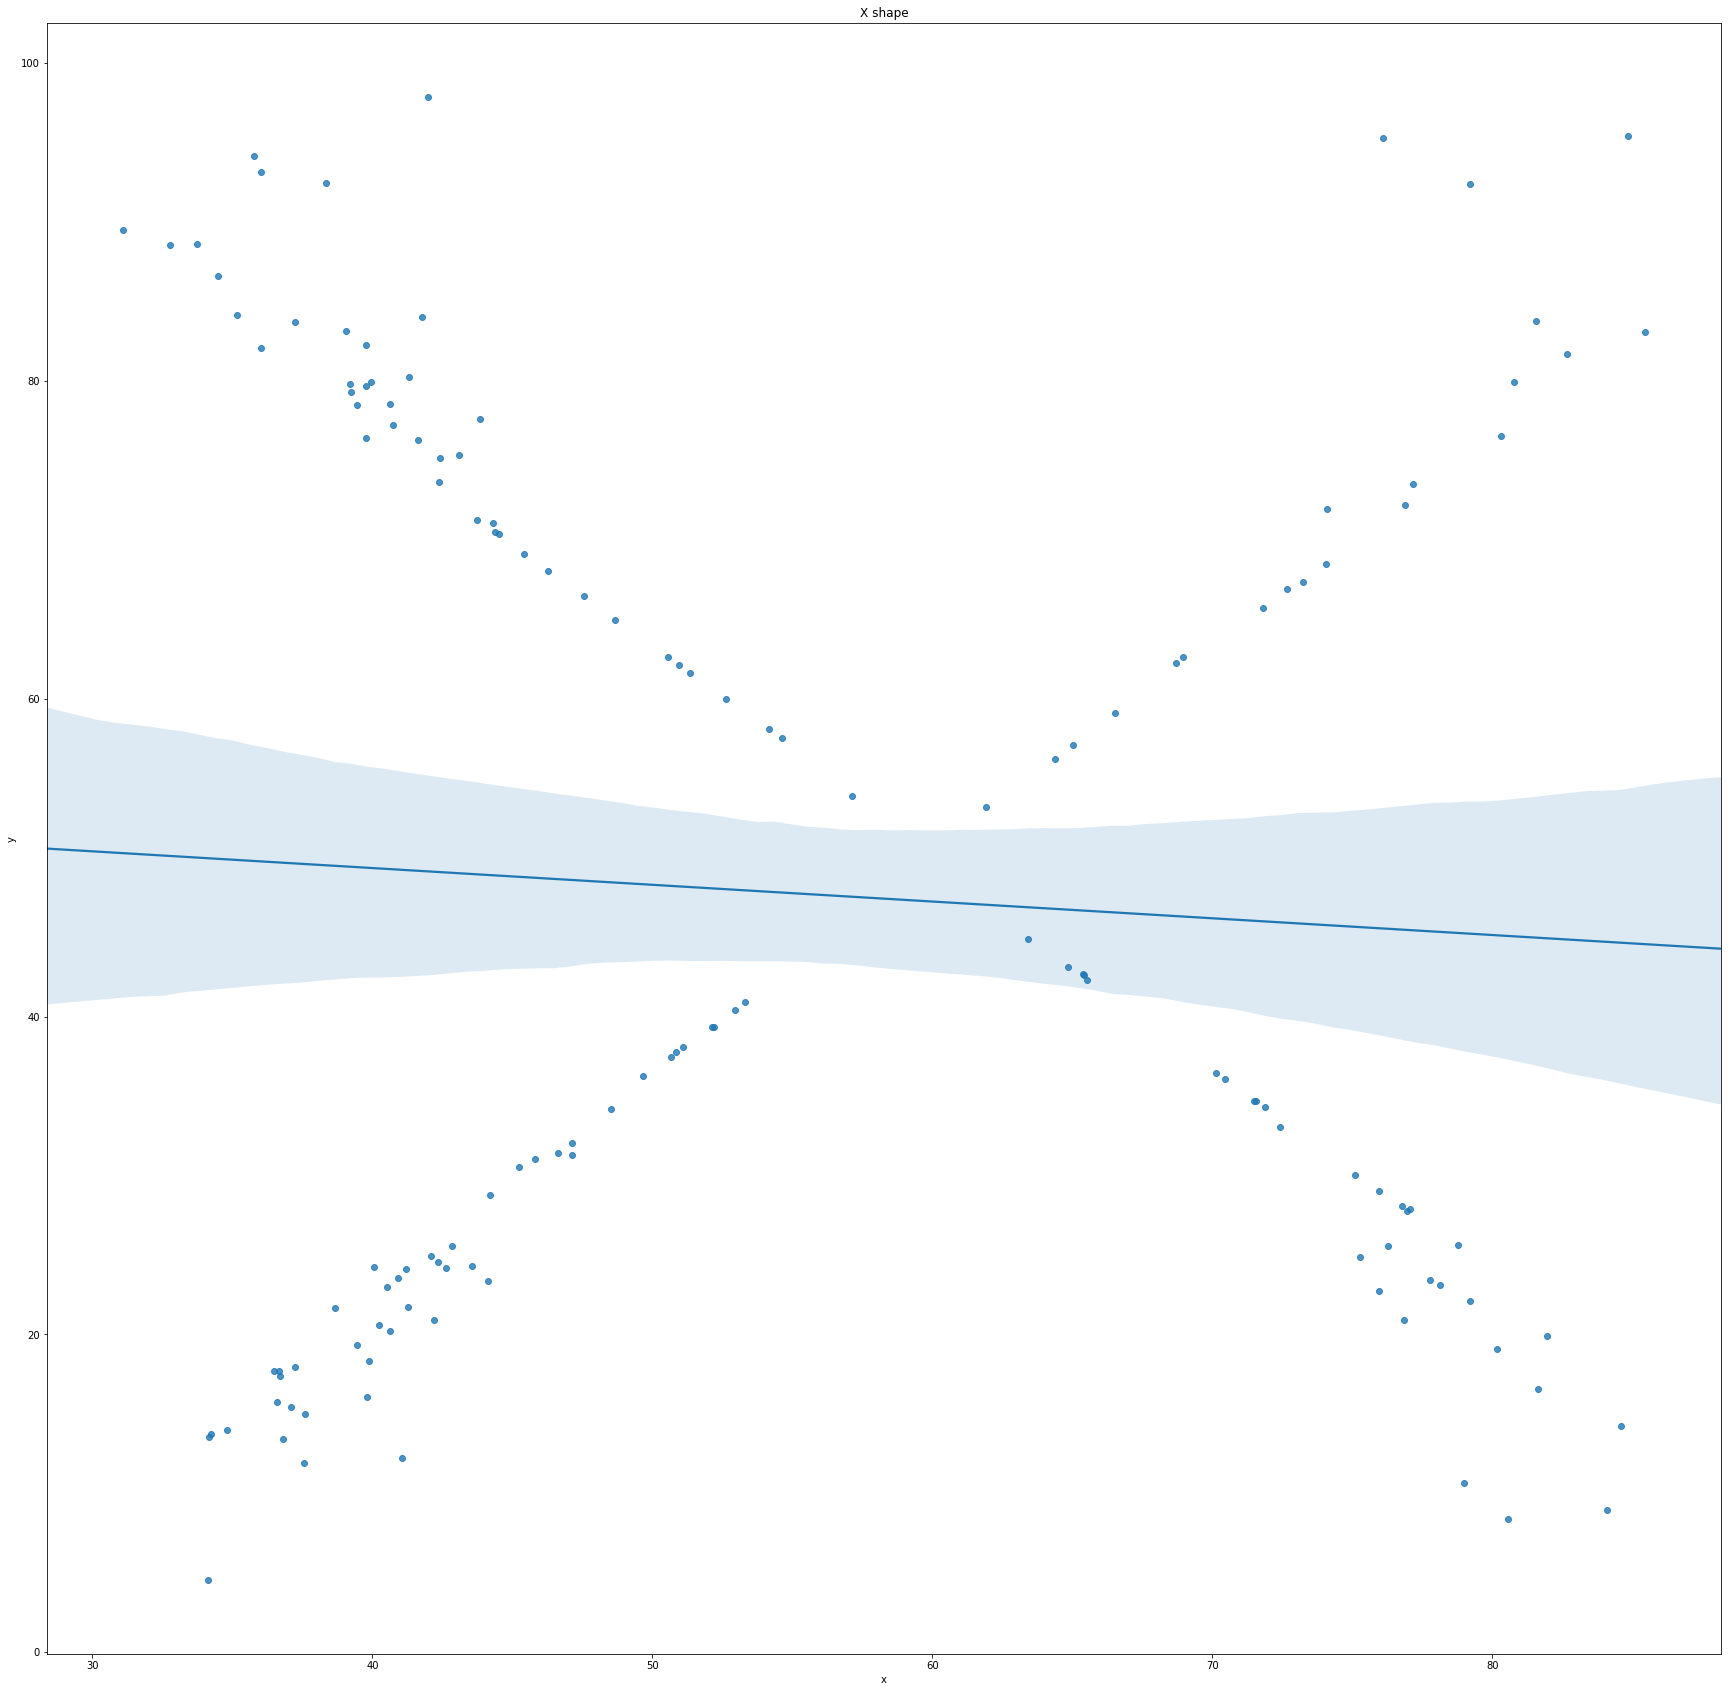

In [86]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = x_shapetable)
plt.title("X shape")

## Dino subset

In [87]:
dinotable = tablesaur.loc[tablesaur["dataset"] == "dino"]
dinotable.drop('dataset', axis = 1).head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


Text(0.5, 1.0, 'Original Datasaur')

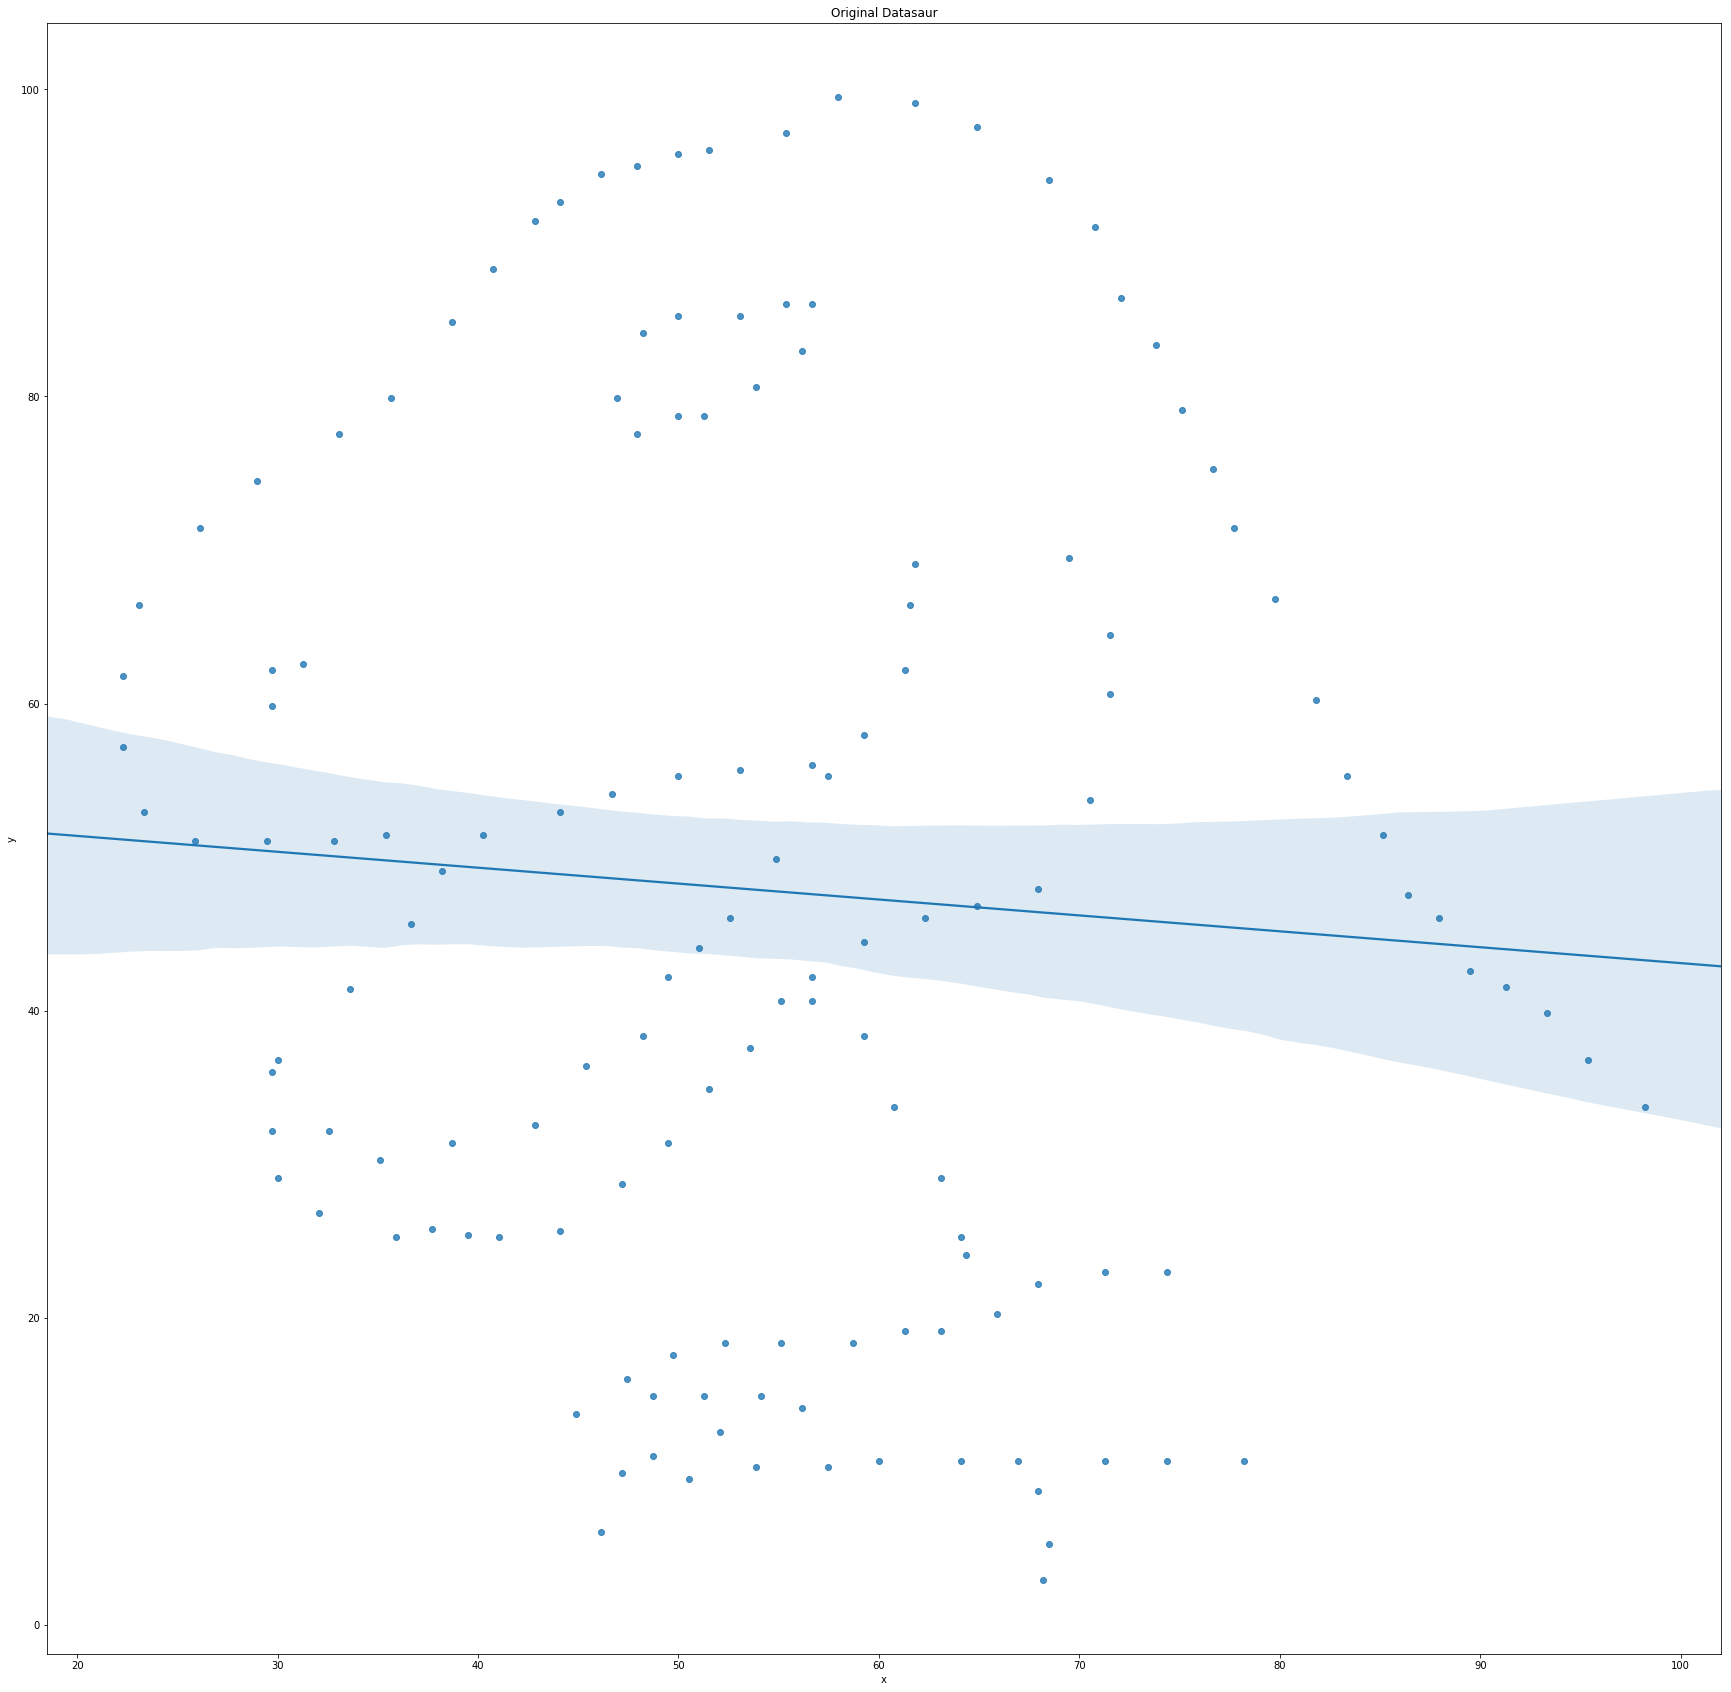

In [88]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = dinotable)
plt.title("Original Datasaur")

## Away subset

In [34]:
awaytable = tablesaur.loc[tablesaur['dataset'] == 'away']
awaytable.drop('dataset', axis = 1).head()

,x,y
142,32.331110,61.411101
143,53.421463,26.186880
144,63.920202,30.832194
145,70.289506,82.533649
146,34.118830,45.734551


Text(0.5, 1.0, 'Slant Up')

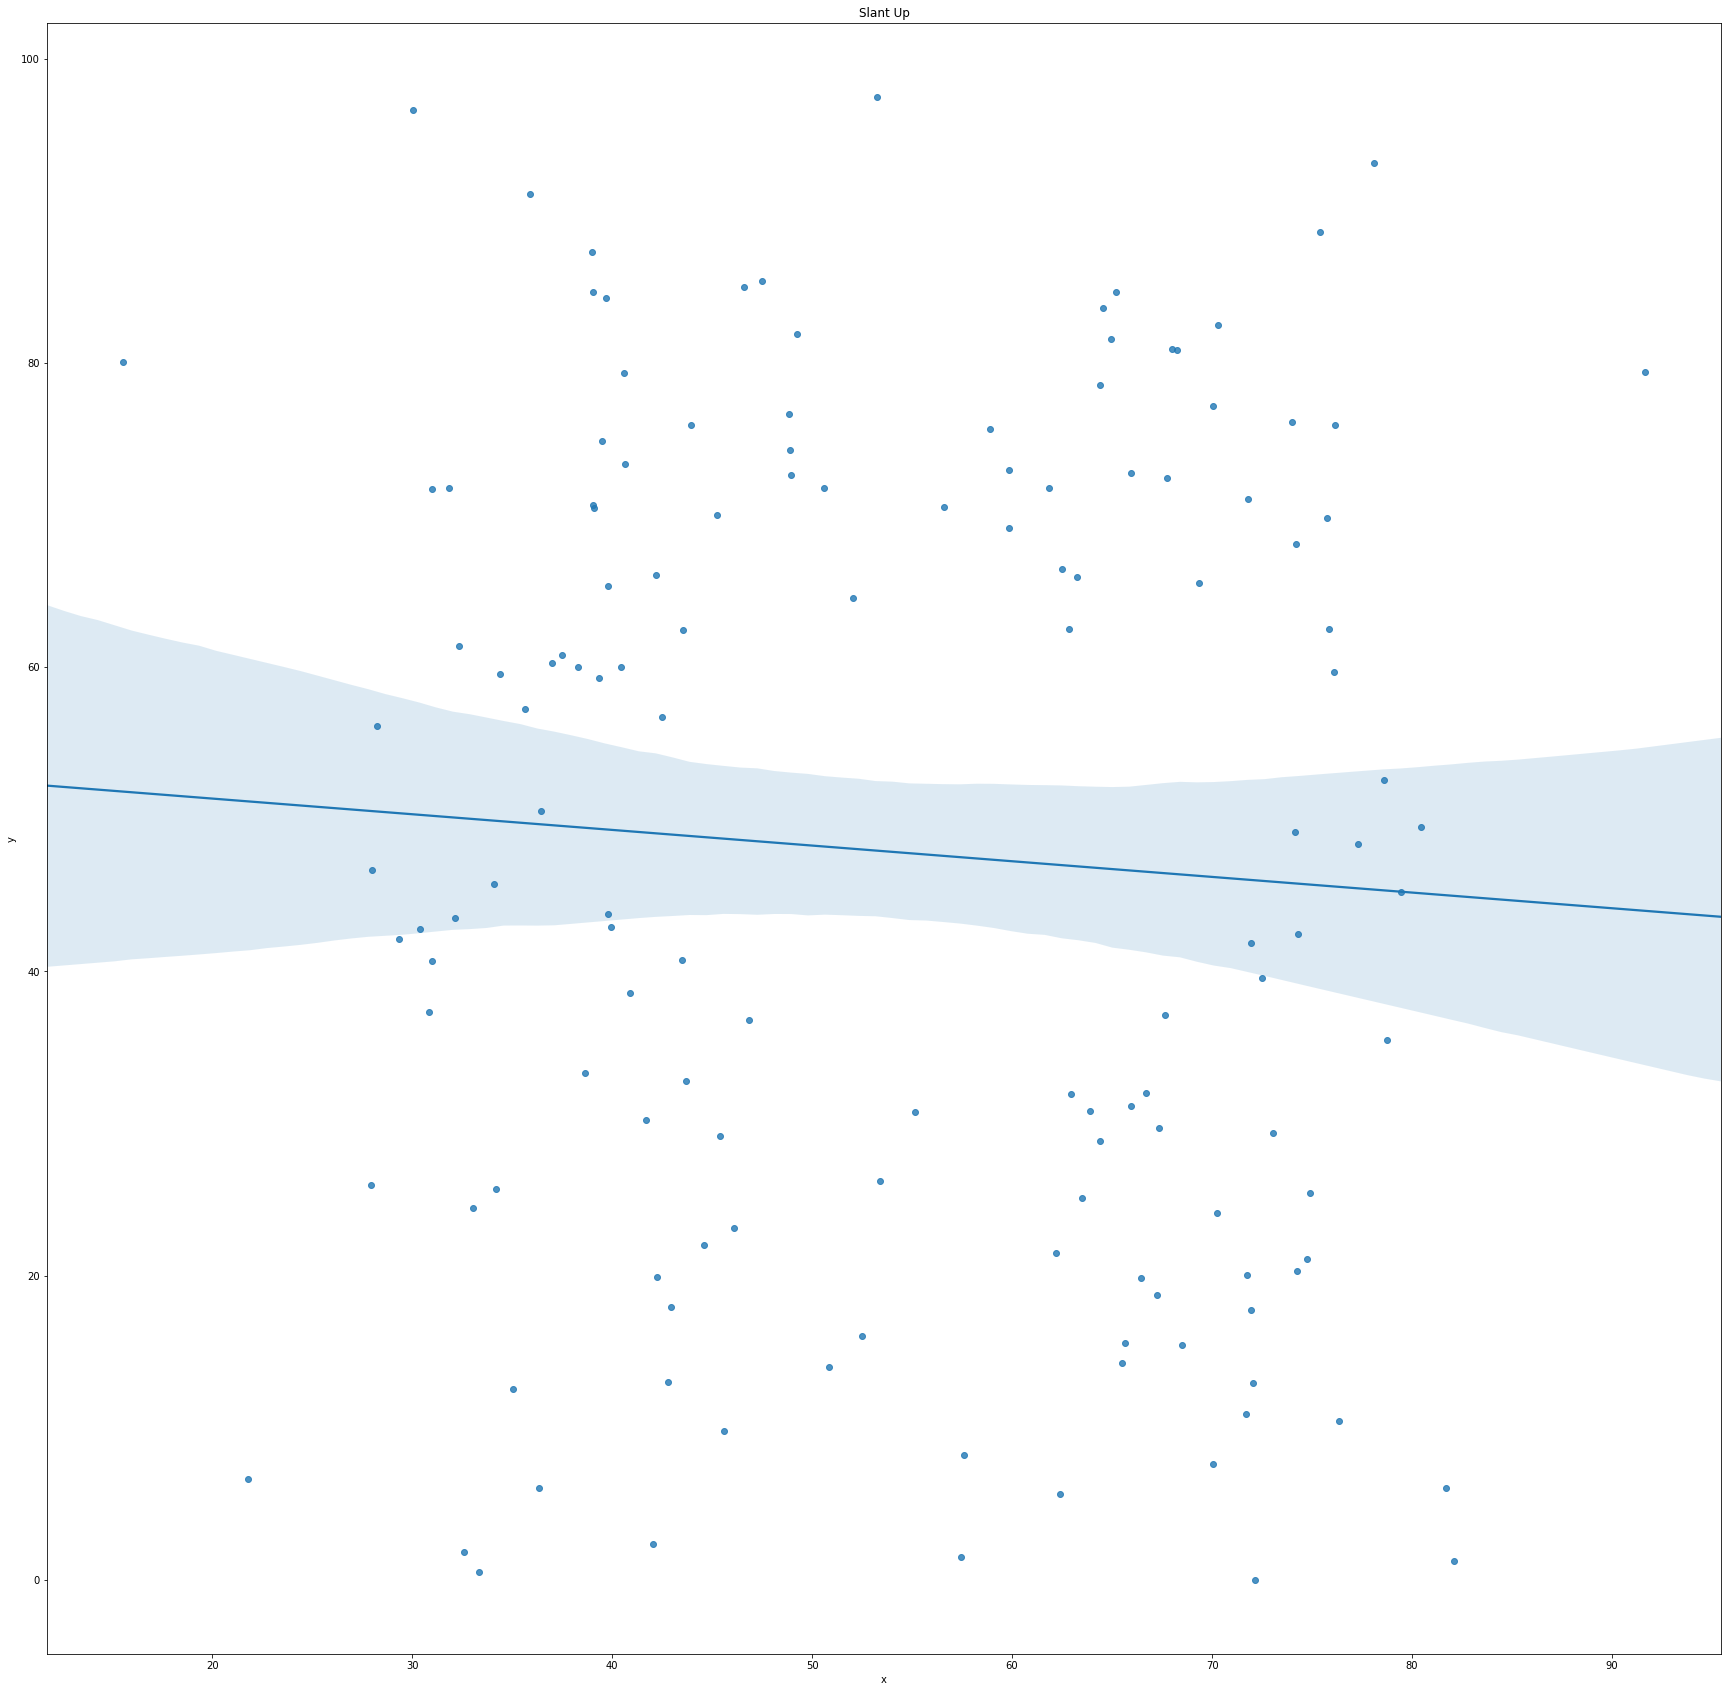

In [35]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = awaytable)
plt.title("Slant Up")

## Horizontal lines subset

In [36]:
h_linestable = tablesaur.loc[tablesaur["dataset"] == "h_lines"]
h_linestable.drop('dataset', axis = 1).head()

,x,y
284,53.366567,90.208030
285,52.801979,90.088065
286,47.054130,90.458936
287,42.448434,89.507700
288,42.704036,90.442629


Text(0.5, 1.0, 'Horizontal Lines')

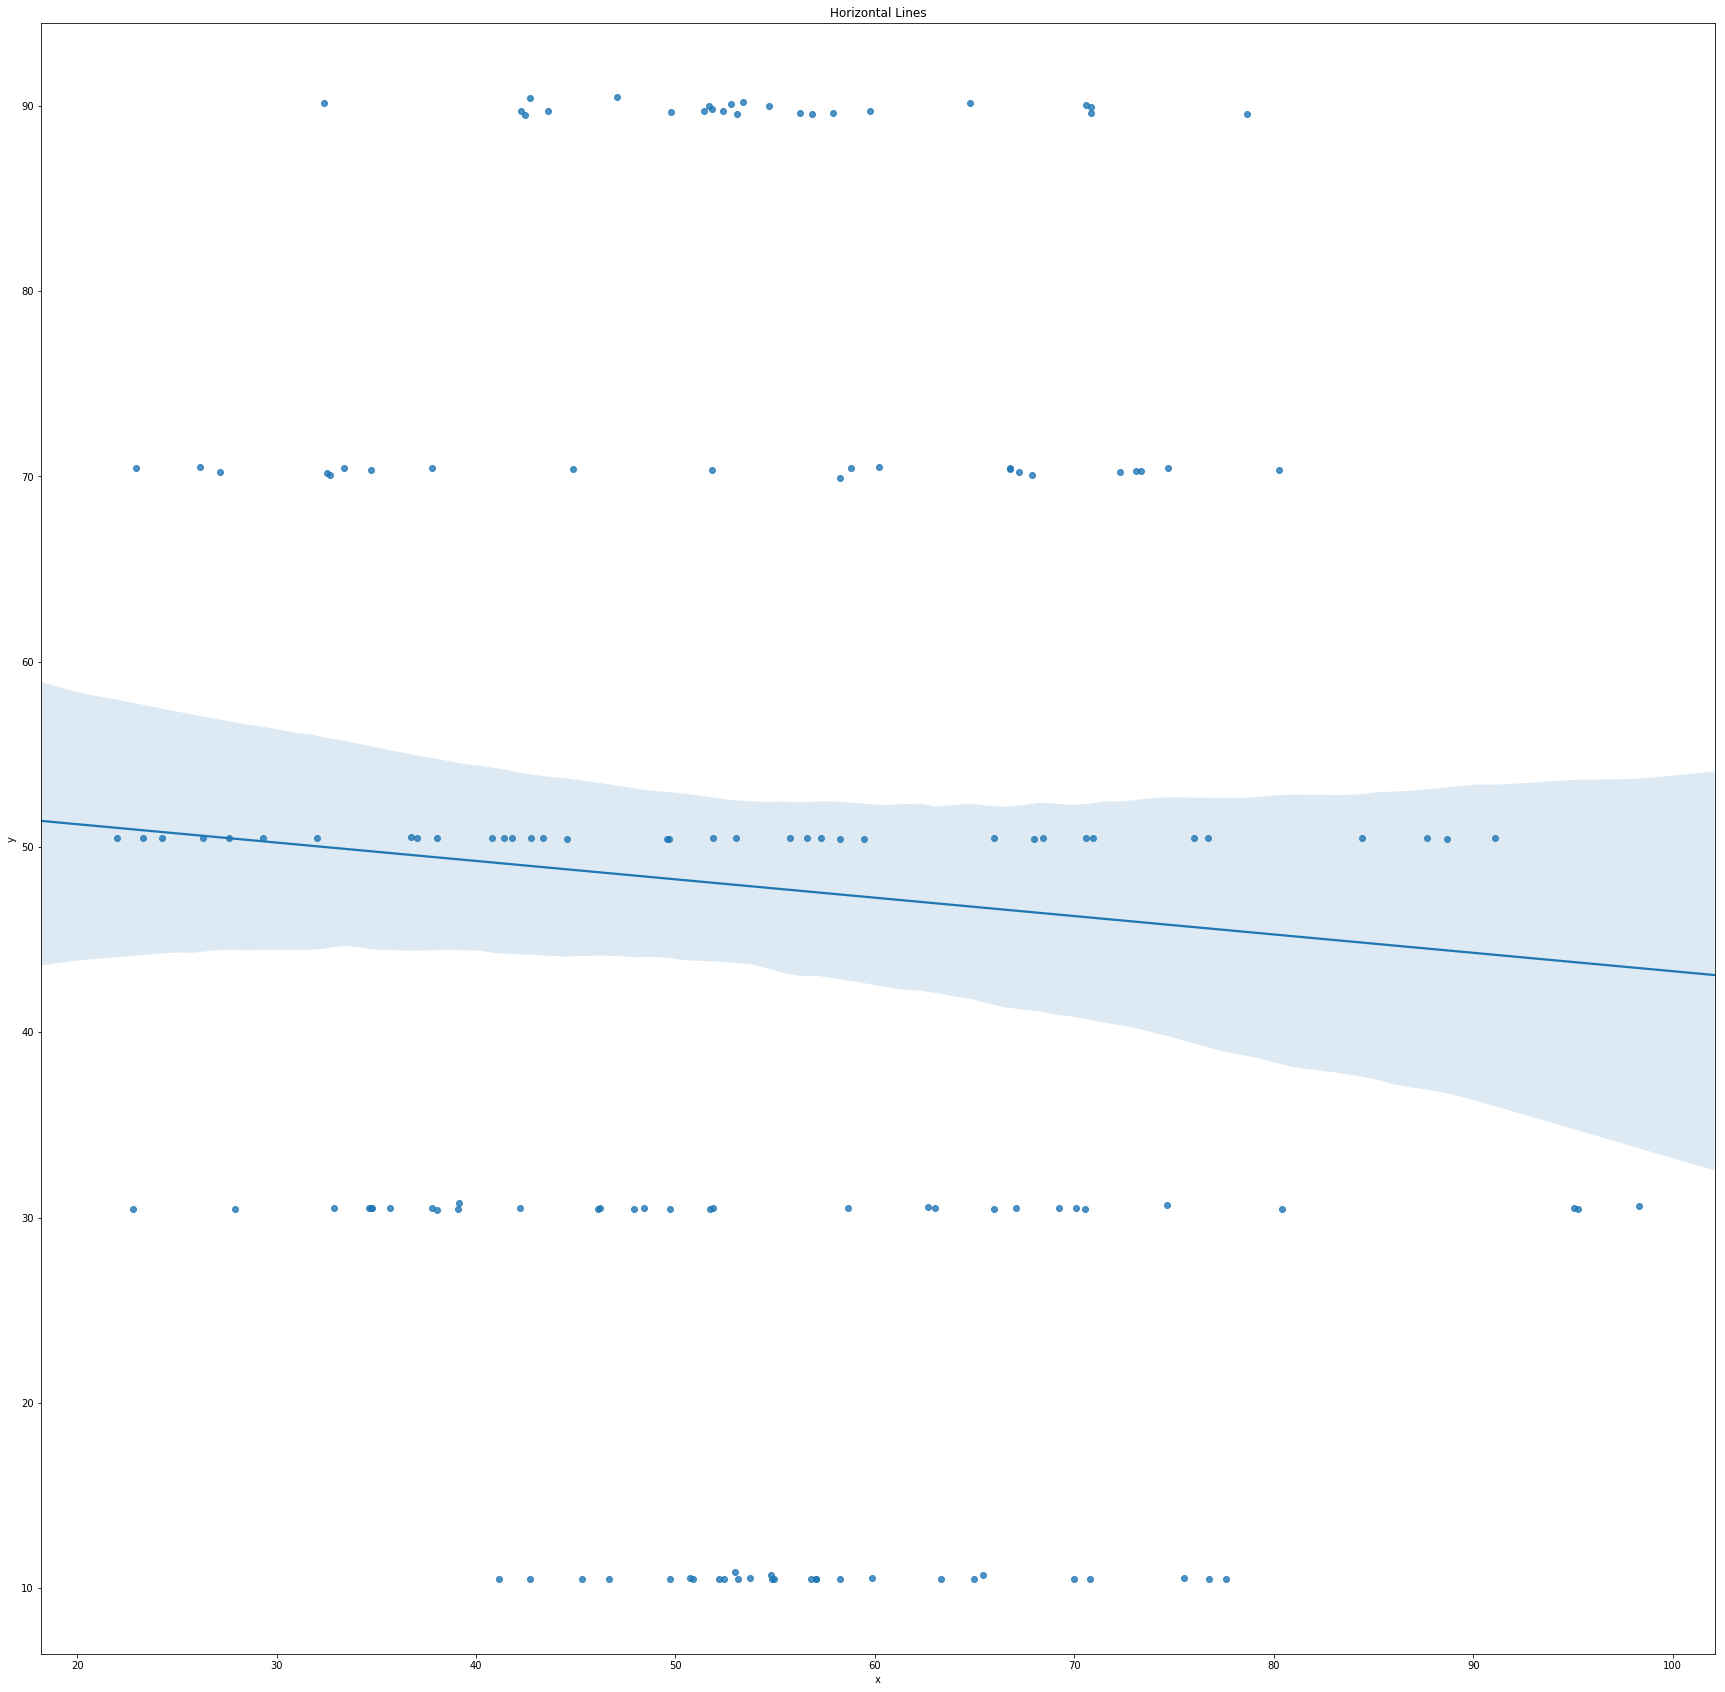

In [38]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = h_linestable)
plt.title("Horizontal Lines")

## Vertical lines subset

In [39]:
v_linestable = tablesaur.loc[tablesaur["dataset"] == "v_lines"]
v_linestable.drop('dataset', axis = 1).head()

,x,y
426,50.481508,93.222701
427,50.282406,97.609984
428,50.186703,99.694680
429,50.326911,90.022053
430,50.456207,89.987410


Text(0.5, 1.0, 'Vertical Lines')

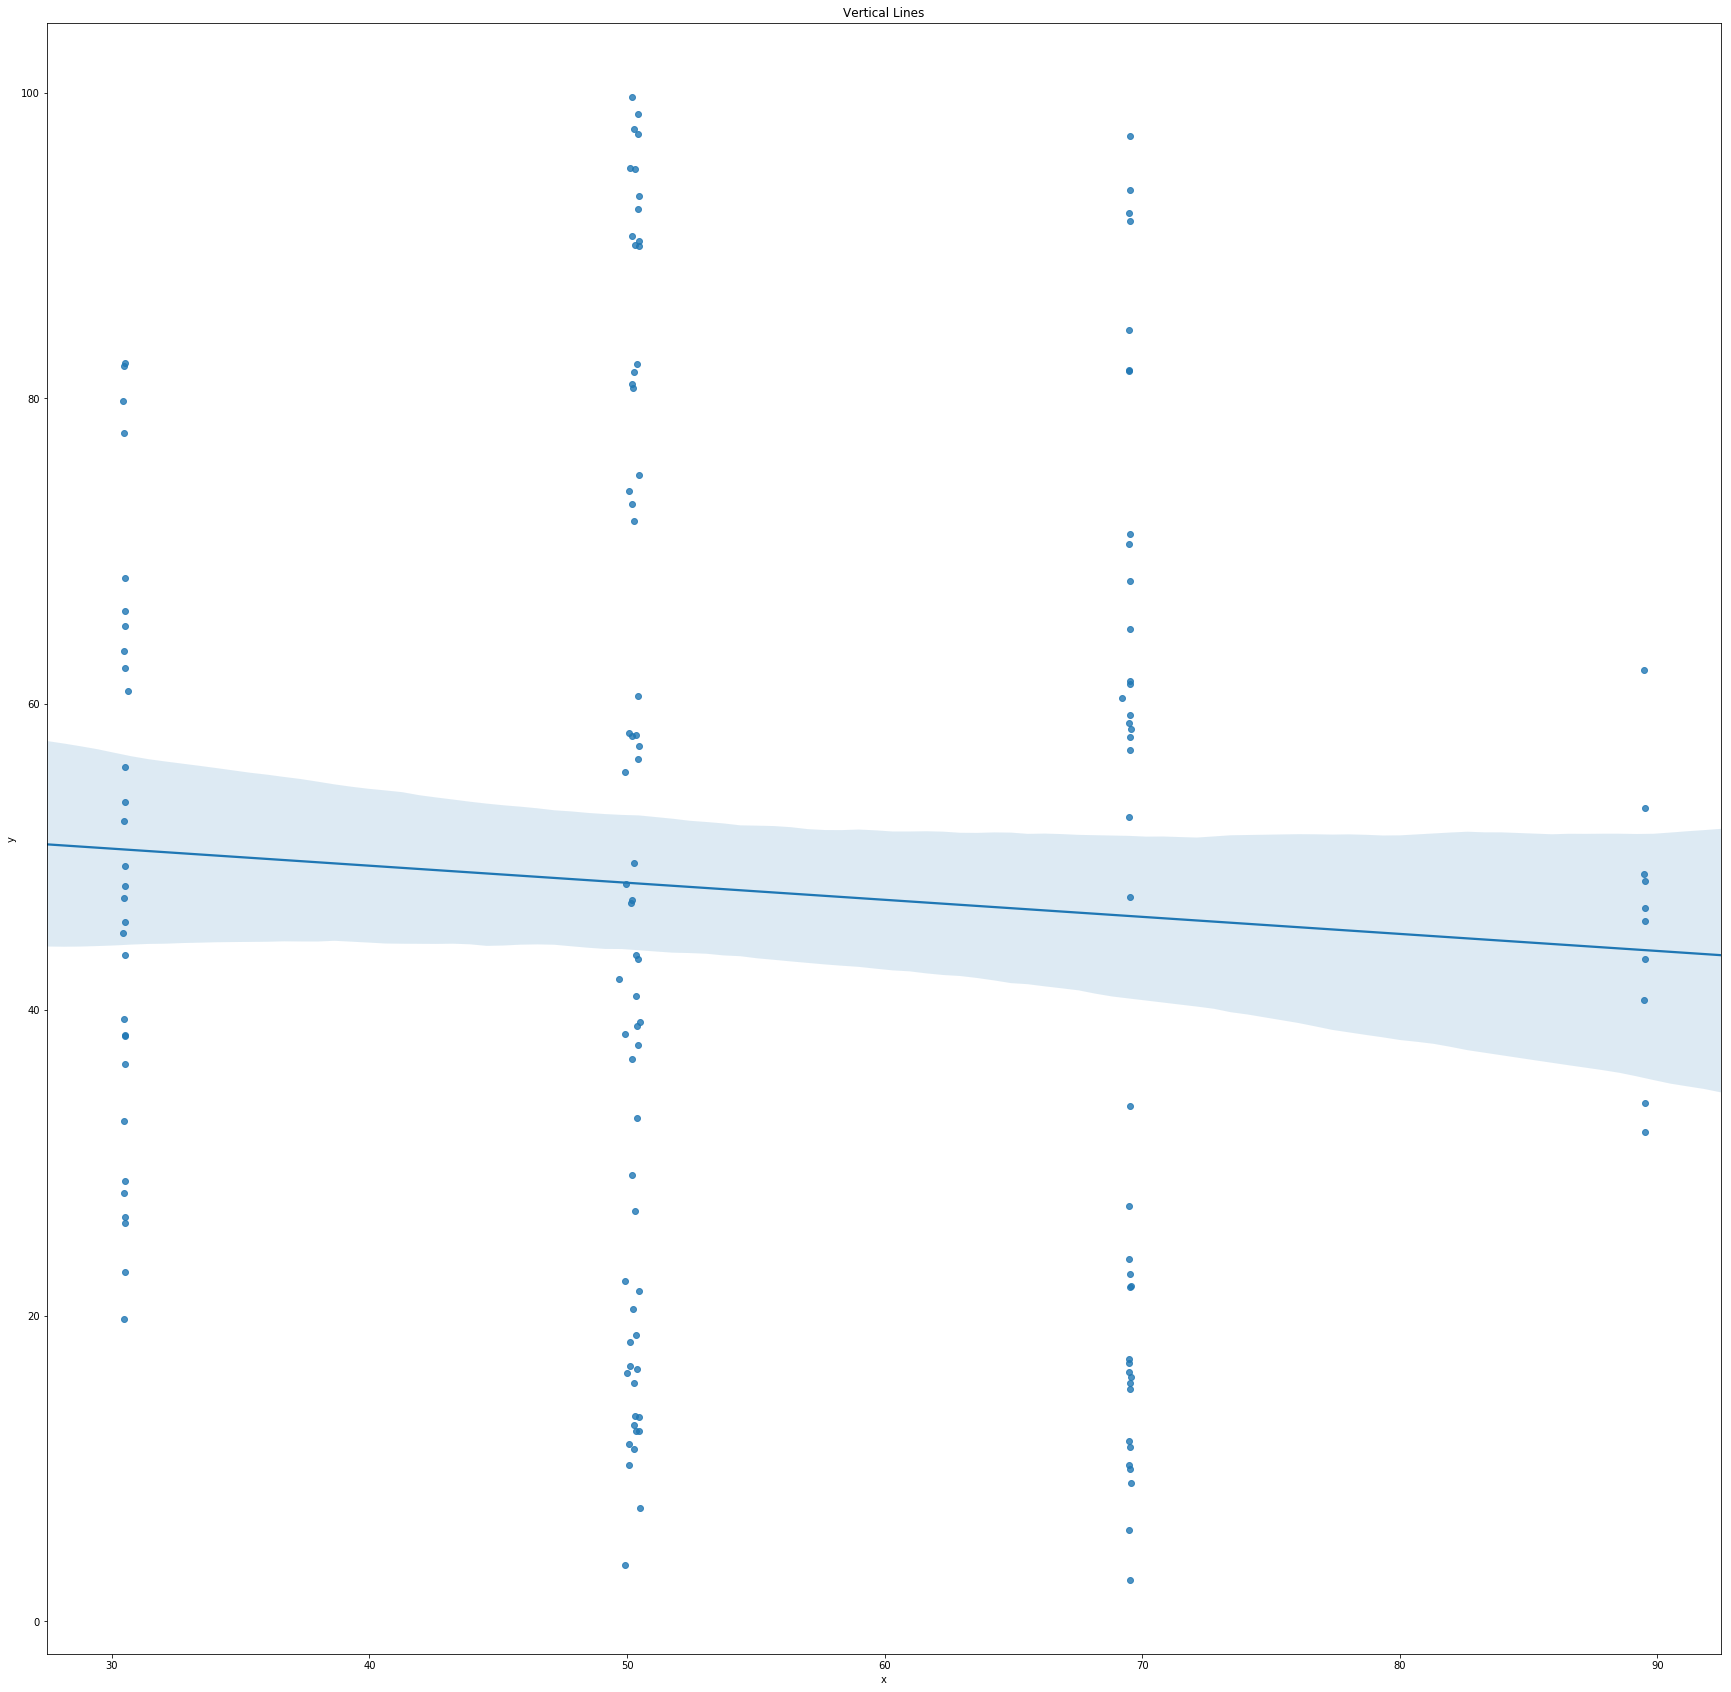

In [41]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = v_linestable)
plt.title("Vertical Lines")

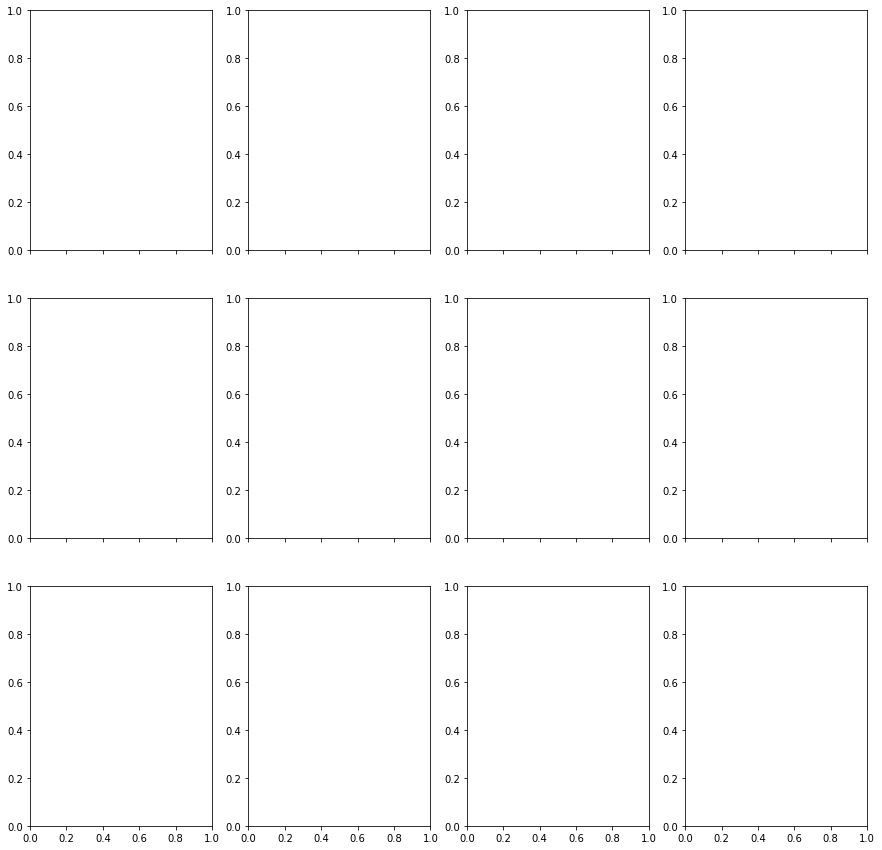

In [53]:
f, axes = plt.subplots(3, 4, figsize=(15, 15), sharex=True)
